## Contents
* 1 Import
* 2 Developing models and lists
* 3 Random Forest all stations
* 4 Madrid
* 5 Oslo
* 6 Valentia

## 1 Import

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
#pleasant weather
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\Other\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

In [3]:
df=pd.read_csv(os.path.join(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\unscaled_cleandf_date.csv"))

In [4]:
df.head()

Unnamed: 0      DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0  19600101                  7            0.85           1.018   
1           1  19600102                  6            0.84           1.018   
2           2  19600103                  8            0.90           1.018   
3           3  19600104                  3            0.92           1.018   
4           4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [5]:
df.shape

(22950, 137)

In [6]:
pleasantdf

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
#make dataframe from df limiting data to one decade, 1990s
yeardf=df[df['DATE'].astype(str).str.contains('199')]
print(yeardf)

           DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101                  0            0.83          1.0217   
10959  19900102                  2            0.84          1.0238   
10960  19900103                  8            0.89          1.0231   
10961  19900104                  2            0.77          1.0265   
10962  19900105                  7            0.81          1.0286   
...         ...                ...             ...             ...   
14605  19991227                  7            0.74          0.9953   
14606  19991228                  8            0.88          0.9956   
14607  19991229                  8            0.84          1.0162   
14608  19991230                  7            0.80          1.0276   
14609  19991231                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959              

In [9]:
#make pleasant dataframe from df limiting data to one decade, 1990s
pleasantyeardf=pleasantdf[pleasantdf['DATE'].astype(str).str.contains('199')]
print(pleasantyeardf)

           DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0     

In [10]:
#taking just data removing date
yeardfnew=yeardf.drop('DATE',axis=1)
yeardfnew

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   
...    ...                 ...                   ...                ...   
14605  ...                 1.6                     7               0.75   
14606  ...                 1.0                     3               0.73   
14607  ...                -1.1                     5               0.81   
14608  ...                -2.5                     8               0.94   
14609  ...                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954      

In [11]:
#removing date column from pleasant year
pleasantdfnew=pleasantyeardf.drop('DATE',axis=1)
pleasantdfnew

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958                       0                          0   
10959                       0                          0   
10960                       0                          0   
10961                       0                          0   
10962                       0                          0   
...                       ...                        ...   
14605                       0                          0   
14606                       0                          0   
14607                       0                          0   
14608                       0                          0   
14609                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0                      0   
10960                          0                      0   
10961                          0  

In [12]:
#export one decade data
yeardfnew.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\cleandf_1990s.csv'))

In [13]:
#export pleasant one decade data
pleasantdfnew.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\1 DATA\MANIPULATED DATA\pleasantdf_1990s.csv'))

## 2 Model and Lists

In [14]:
tf.random.set_seed(42)

In [15]:
#creating prediction
predictions = ['BASEL','BELGRADE','BUDAPEST','DEBILT','DUSSELDORF',
'HEATHROW','KASSEL','LJUBLJANA','MAASTRICHT', 'MADRID','MUNCHENB',
 'OSLO','SONNBLICK','STOCKHOLM','VALENTIA',]

In [29]:
# single column pleasant weather
y_single = pleasantdfnew.max(axis=1)
print(y_single.shape)

(3652,)


In [30]:
print(y_single.unique())

[0 1]


In [31]:
# reshape y
y_single = y_single.to_numpy().reshape(-1)
print(y_single.shape)

(3652,)


In [32]:
#create x
X = yeardfnew.to_numpy()

#changing data format
X=np.array(X)
y=np.array(y)

#reshaping X
X = X.reshape(-1,15,9)

In [33]:
print(X.shape)
print(y_single.shape)

(3652, 135)
(3652,)


In [34]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y_single,test_size=0.2)

In [35]:
y_train

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
X_train

array([[ 8.    ,  0.84  ,  1.0351, ...,  4.8   ,  0.9   ,  8.7   ],
       [ 4.    ,  0.75  ,  1.0194, ..., 15.3   , 12.1   , 18.5   ],
       [ 3.    ,  0.71  ,  1.0188, ..., 12.9   , 11.1   , 14.6   ],
       ...,
       [ 6.    ,  0.72  ,  1.0113, ..., 10.2   ,  5.    , 15.5   ],
       [ 3.    ,  0.57  ,  1.0144, ..., 13.4   , 12.    , 14.9   ],
       [ 7.    ,  0.76  ,  1.0265, ..., 13.9   , 11.5   , 16.4   ]])

In [37]:
print(X_train.shape)
print(y_train.shape)

(2921, 135)
(2921,)


X_train.flatten()

y_train.flatten()

## 3 Random Forests for All Stations, One decade

In [38]:
%matplotlib inline

In [39]:
len(X_train[0])

135

In [40]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9671682626538988


[Text(0.49551361386138615, 0.9642857142857143, 'x[69] <= 8.15\ngini = 0.476\nsamples = 1844\nvalue = [1143, 1778]\nclass = BELGRADE'),
 Text(0.2823329207920792, 0.8928571428571429, 'x[120] <= 0.365\ngini = 0.236\nsamples = 736\nvalue = [1016, 161]\nclass = BASEL'),
 Text(0.17481435643564355, 0.8214285714285714, 'x[87] <= 13.45\ngini = 0.087\nsamples = 533\nvalue = [794, 38]\nclass = BASEL'),
 Text(0.1318069306930693, 0.75, 'x[60] <= 8.7\ngini = 0.039\nsamples = 518\nvalue = [788, 16]\nclass = BASEL'),
 Text(0.07549504950495049, 0.6785714285714286, 'x[10] <= 0.535\ngini = 0.015\nsamples = 496\nvalue = [765, 6]\nclass = BASEL'),
 Text(0.0297029702970297, 0.6071428571428571, 'x[131] <= 4.3\ngini = 0.219\nsamples = 10\nvalue = [14, 2]\nclass = BASEL'),
 Text(0.019801980198019802, 0.5357142857142857, 'x[57] <= 0.36\ngini = 0.124\nsamples = 9\nvalue = [14, 1]\nclass = BASEL'),
 Text(0.009900990099009901, 0.4642857142857143, 'gini = 0.0\nsamples = 7\nvalue = [13, 0]\nclass = BASEL'),
 Text(0.

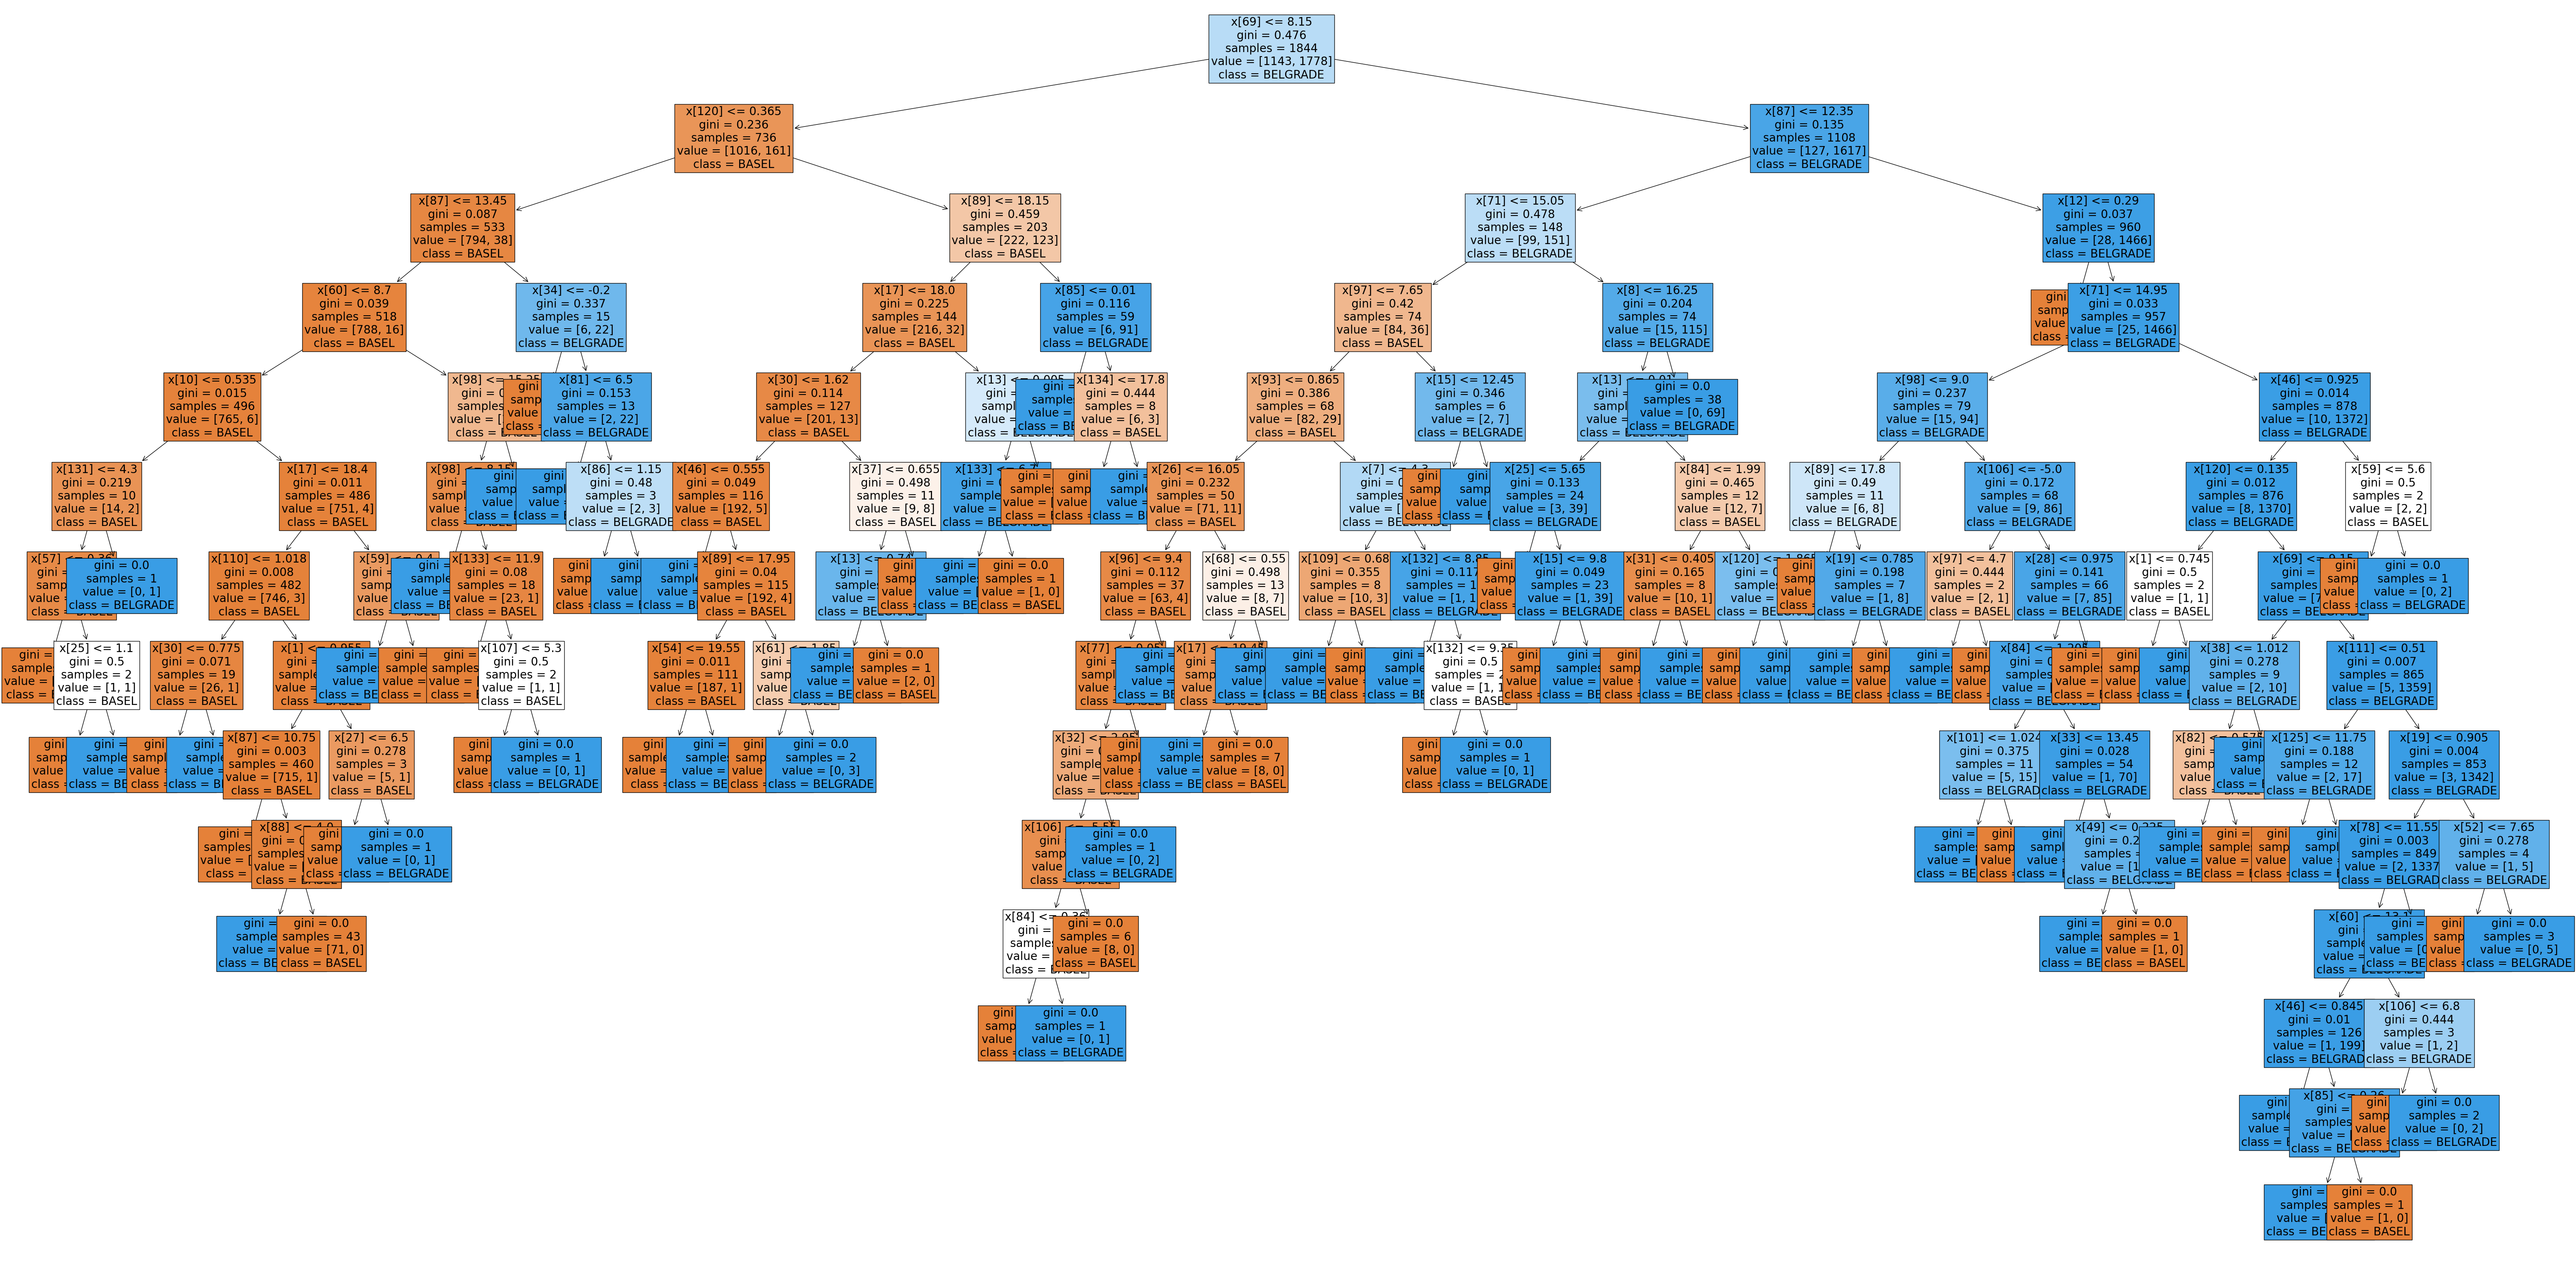

In [42]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=predictions, filled=True)

In [43]:
fig.savefig(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\3 VISUALIZATIONS/decision_tree.png")

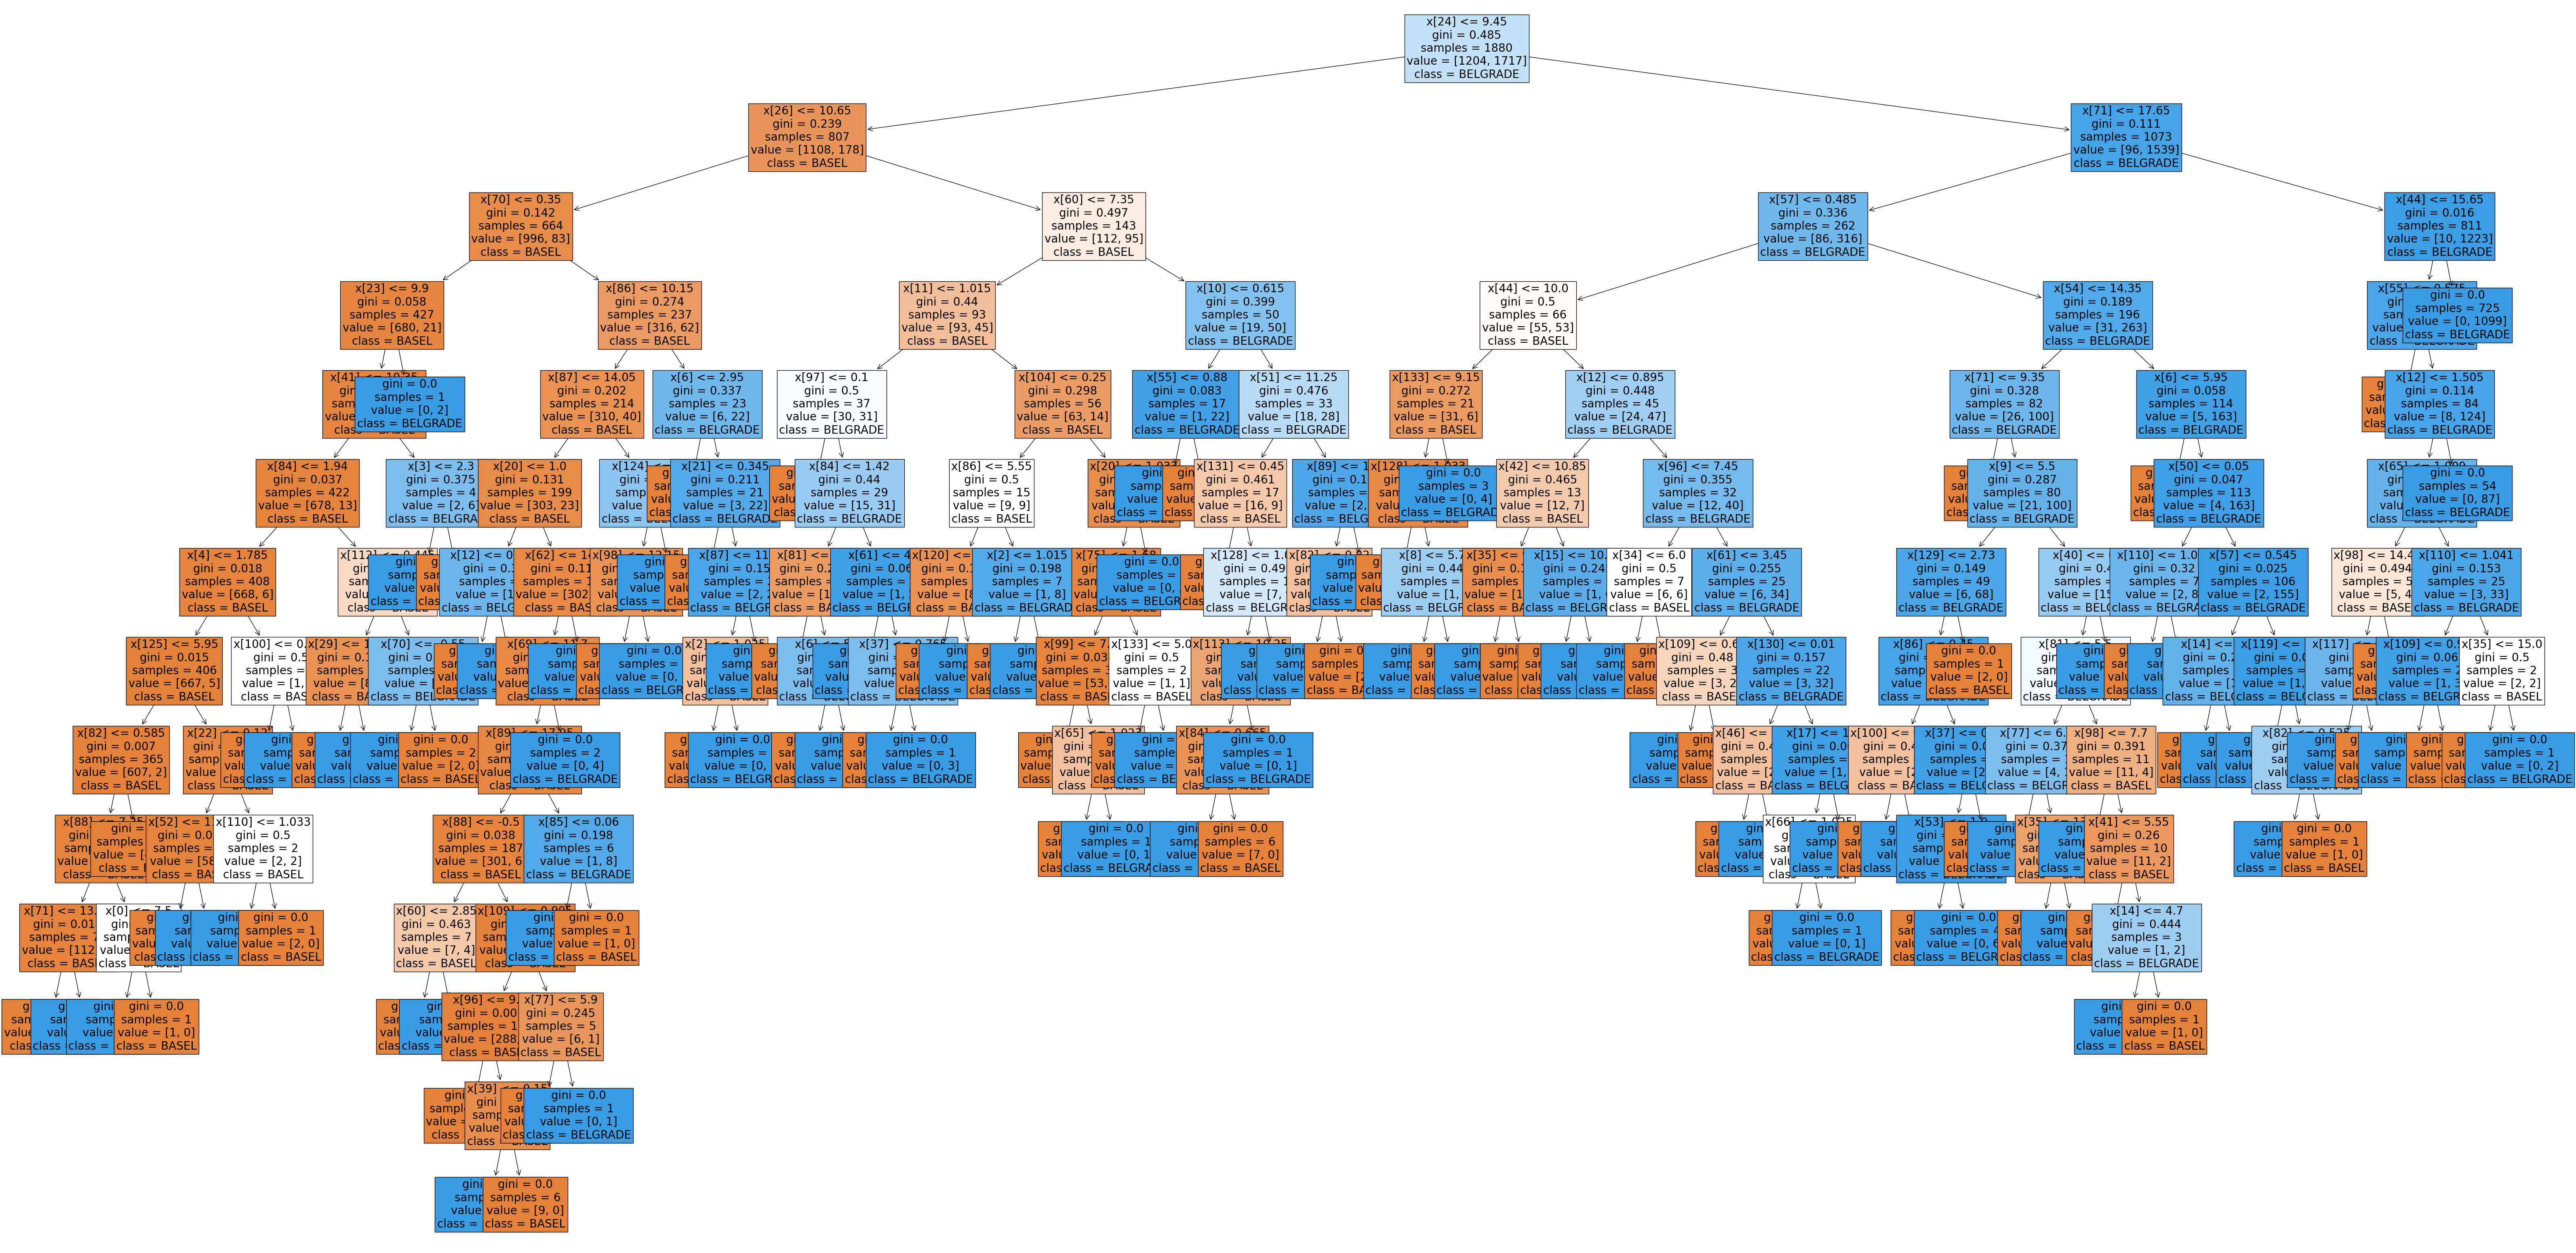

In [44]:
fig2 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=predictions, filled=True);

In [45]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00038598, 0.00121464, 0.0011974 , 0.00247431, 0.00173195,
       0.00110563, 0.03629742, 0.00178873, 0.01525863, 0.00160698,
       0.00405671, 0.00118564, 0.00907675, 0.00349945, 0.00201111,
       0.03140186, 0.00355355, 0.02424446, 0.00070333, 0.00126464,
       0.00146477, 0.00304105, 0.00159371, 0.00140522, 0.07065113,
       0.01575985, 0.03147744, 0.000688  , 0.00149825, 0.0011889 ,
       0.00244244, 0.00080412, 0.00092388, 0.00171937, 0.00154407,
       0.02026275, 0.00083098, 0.00075857, 0.0013134 , 0.00447045,
       0.00066719, 0.00084146, 0.00837291, 0.00109803, 0.02031636,
       0.000448  , 0.00170072, 0.00147619, 0.00635818, 0.0005059 ,
       0.00161904, 0.00934443, 0.00201198, 0.00055069, 0.00823742,
       0.00119506, 0.00106069, 0.00268666, 0.00070314, 0.00071913,
       0.01529807, 0.00165618, 0.02379304, 0.00061244, 0.00257631,
       0.00175795, 0.00261431, 0.00128444, 0.00157367, 0.06103386,
       0.0050015 , 0.08989524, 0.00056564, 0.0008035 , 0.00094

In [46]:
np.set_printoptions(threshold=1000)

In [47]:
newarray = newarray.reshape(-1,9,15)
print(newarray.shape)
newarray

(1, 9, 15)


array([[[0.00038598, 0.00121464, 0.0011974 , 0.00247431, 0.00173195,
         0.00110563, 0.03629742, 0.00178873, 0.01525863, 0.00160698,
         0.00405671, 0.00118564, 0.00907675, 0.00349945, 0.00201111],
        [0.03140186, 0.00355355, 0.02424446, 0.00070333, 0.00126464,
         0.00146477, 0.00304105, 0.00159371, 0.00140522, 0.07065113,
         0.01575985, 0.03147744, 0.000688  , 0.00149825, 0.0011889 ],
        [0.00244244, 0.00080412, 0.00092388, 0.00171937, 0.00154407,
         0.02026275, 0.00083098, 0.00075857, 0.0013134 , 0.00447045,
         0.00066719, 0.00084146, 0.00837291, 0.00109803, 0.02031636],
        [0.000448  , 0.00170072, 0.00147619, 0.00635818, 0.0005059 ,
         0.00161904, 0.00934443, 0.00201198, 0.00055069, 0.00823742,
         0.00119506, 0.00106069, 0.00268666, 0.00070314, 0.00071913],
        [0.01529807, 0.00165618, 0.02379304, 0.00061244, 0.00257631,
         0.00175795, 0.00261431, 0.00128444, 0.00157367, 0.06103386,
         0.0050015 , 0.0898952

In [48]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.0727882 , 0.01880028, 0.08660667, 0.02478976, 0.01260296,
       0.04663019, 0.09200335, 0.01795607, 0.05124769, 0.16574155,
       0.03336163, 0.13243111, 0.09611941, 0.0224536 , 0.12646753])

In [49]:
important = pd.Series(sumarray, index = predictions)
important

BASEL         0.072788
BELGRADE      0.018800
BUDAPEST      0.086607
DEBILT        0.024790
DUSSELDORF    0.012603
HEATHROW      0.046630
KASSEL        0.092003
LJUBLJANA     0.017956
MAASTRICHT    0.051248
MADRID        0.165742
MUNCHENB      0.033362
OSLO          0.132431
SONNBLICK     0.096119
STOCKHOLM     0.022454
VALENTIA      0.126468
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


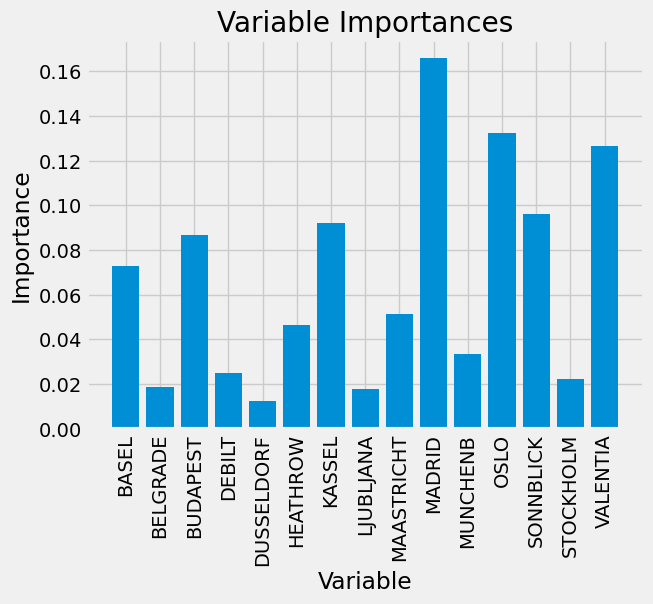

In [53]:
%matplotlib inline

fig3=plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(predictions)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, predictions, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.savefig('Station Influence Bar.png',dpi=400)

* budapest, heathrow and maastricht are the top 3 weather stations (when I ran the model on 7/29, model accuracy at 0.68)
* madrid, oslo, and valentia are the top 3 weather stations (when i ran the moel on 8/2 after some code adjustments and now a higher accuracy of 0.96)

## 4 Madrid Weather Station, One Decade

In [56]:
#viewing original df
df.head()

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   
1  19600102                  6            0.84           1.018   
2  19600103                  8            0.90           1.018   
3  19600104                  3            0.92           1.018   
4  19600105                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [58]:
#make dataframe from df limiting data to one station
madriddf=df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]
madriddf.head()

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92           1.0260   
1                   7             0.86           1.0254   
2                   5             0.90           1.0287   
3                   0             0.75           1.0281   
4                   2             0.64           1.0269   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   
1                     0.46                   0.0              0.9   
2                     0.63                   0.0              2.3   
3                     1.16                   0.0              8.7   
4                     1.10                   0.0              7.8   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8  
1               9.8              7.4             12.2  
2               8.6              6.4             10.8  
3              10.3              4.5             16.1  
4              12.1              8.2             16.0

In [59]:
pleasantdf.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

In [60]:
#make dataframe from pleasantdf limiting data to one stations
madridpleasant=pleasantdf[pleasantdf.columns[pleasantdf.columns.astype(str).str.startswith('MADRID')]]
madridpleasant.head()

MADRID_pleasant_weather
0                        0
1                        0
2                        0
3                        0
4                        0

In [63]:
#checking shape
print(madriddf.shape)
print(madridpleasant.shape)

(22950, 9)
(22950, 1)


In [64]:
#y
madridy=madridpleasant.max(axis=1)
print(madridy.shape)

(22950,)


In [68]:
#x
madridX=madriddf.to_numpy()
print(madriddf.shape)

(22950, 9)


In [69]:
# Split data into training and testing sets
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(madridX, madridy, random_state=2)

# Check shapes
print(X_train_M.shape, y_train_M.shape)
print(X_test_M.shape, y_test_M.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [103]:
# Creating a Random Forest classifier
clfM = RandomForestClassifier(n_estimators = 100, max_depth=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clfM.fit(X_train_M, y_train_M)

RandomForestClassifier(max_depth=2)

In [104]:
# performing predictions on the test dataset
y_pred_M = clfM.predict(X_test_M)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_M, y_pred_M))

Model Accuracy:  0.9614848379226211


In [105]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

[Text(0.5, 0.8333333333333334, 'x[6] <= 13.25\ngini = 0.494\nsamples = 10920\nvalue = [9518, 7694]\nclass = cloud_cover'),
 Text(0.25, 0.5, 'x[8] <= 17.95\ngini = 0.083\nsamples = 5190\nvalue = [7778, 354]\nclass = cloud_cover'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 4934\nvalue = [7734, 0]\nclass = cloud_cover'),
 Text(0.375, 0.16666666666666666, 'gini = 0.197\nsamples = 256\nvalue = [44, 354]\nclass = humidity'),
 Text(0.75, 0.5, 'x[5] <= 7.25\ngini = 0.31\nsamples = 5730\nvalue = [1740, 7340]\nclass = humidity'),
 Text(0.625, 0.16666666666666666, 'gini = 0.462\nsamples = 1083\nvalue = [1093, 621]\nclass = cloud_cover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.16\nsamples = 4647\nvalue = [647, 6719]\nclass = humidity')]

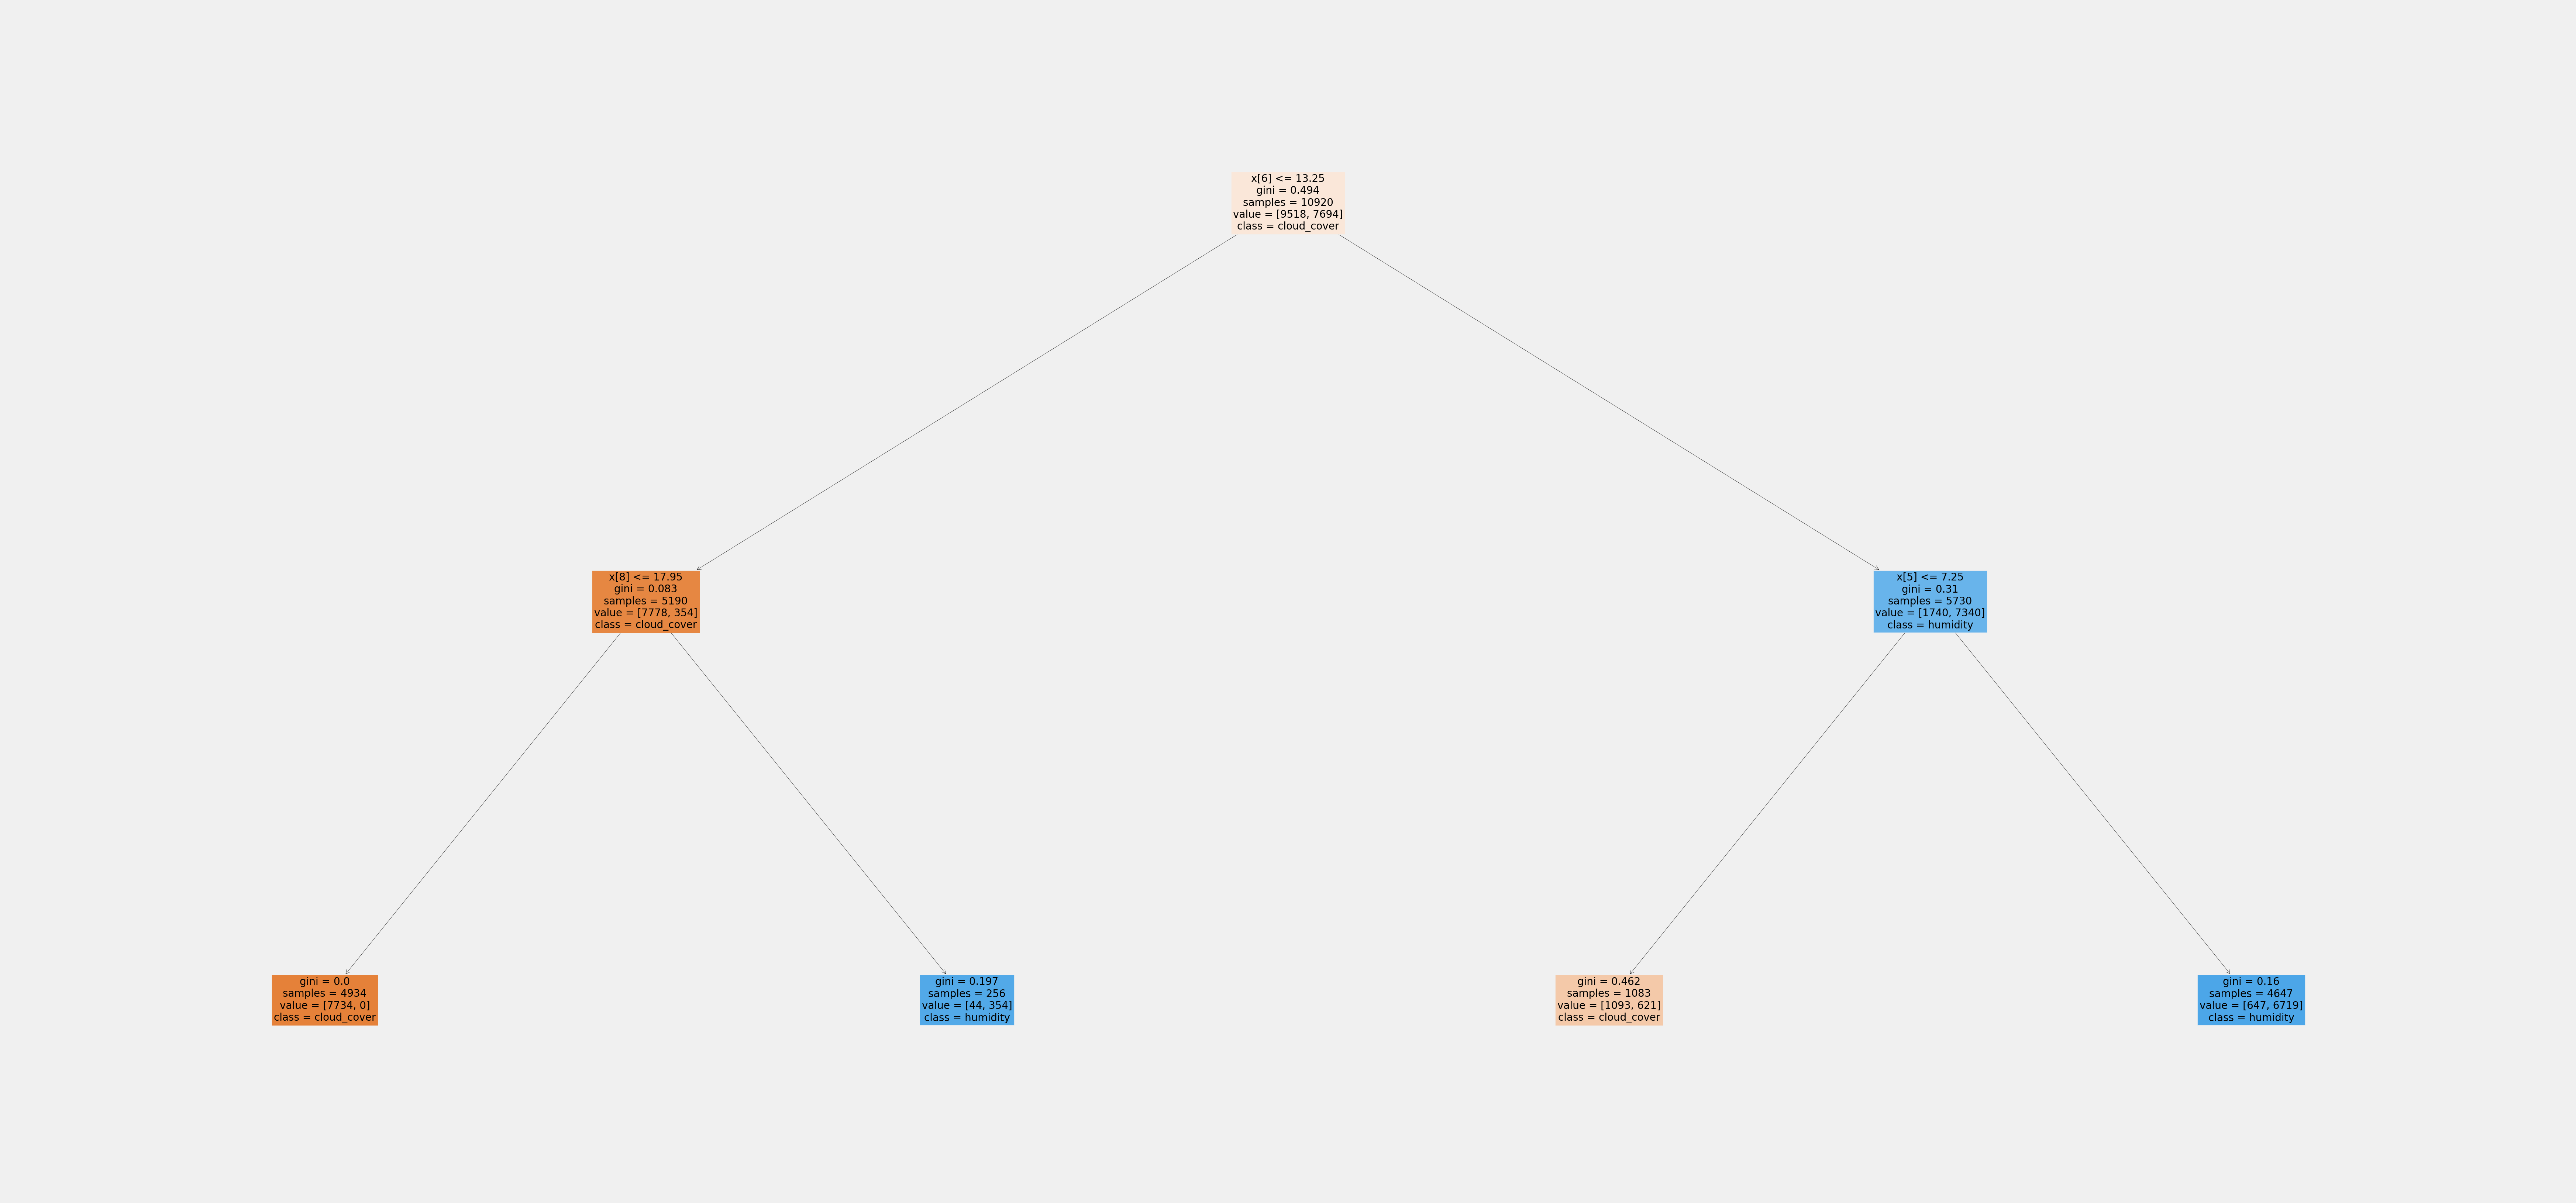

In [106]:
figM = plt.figure(figsize=(80,40))
plot_tree(clfM.estimators_[15], fontsize = 20, class_names=measurements, filled=True)

In [107]:
figM.savefig(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\3 VISUALIZATIONS/MADRID_decision_tree.png")

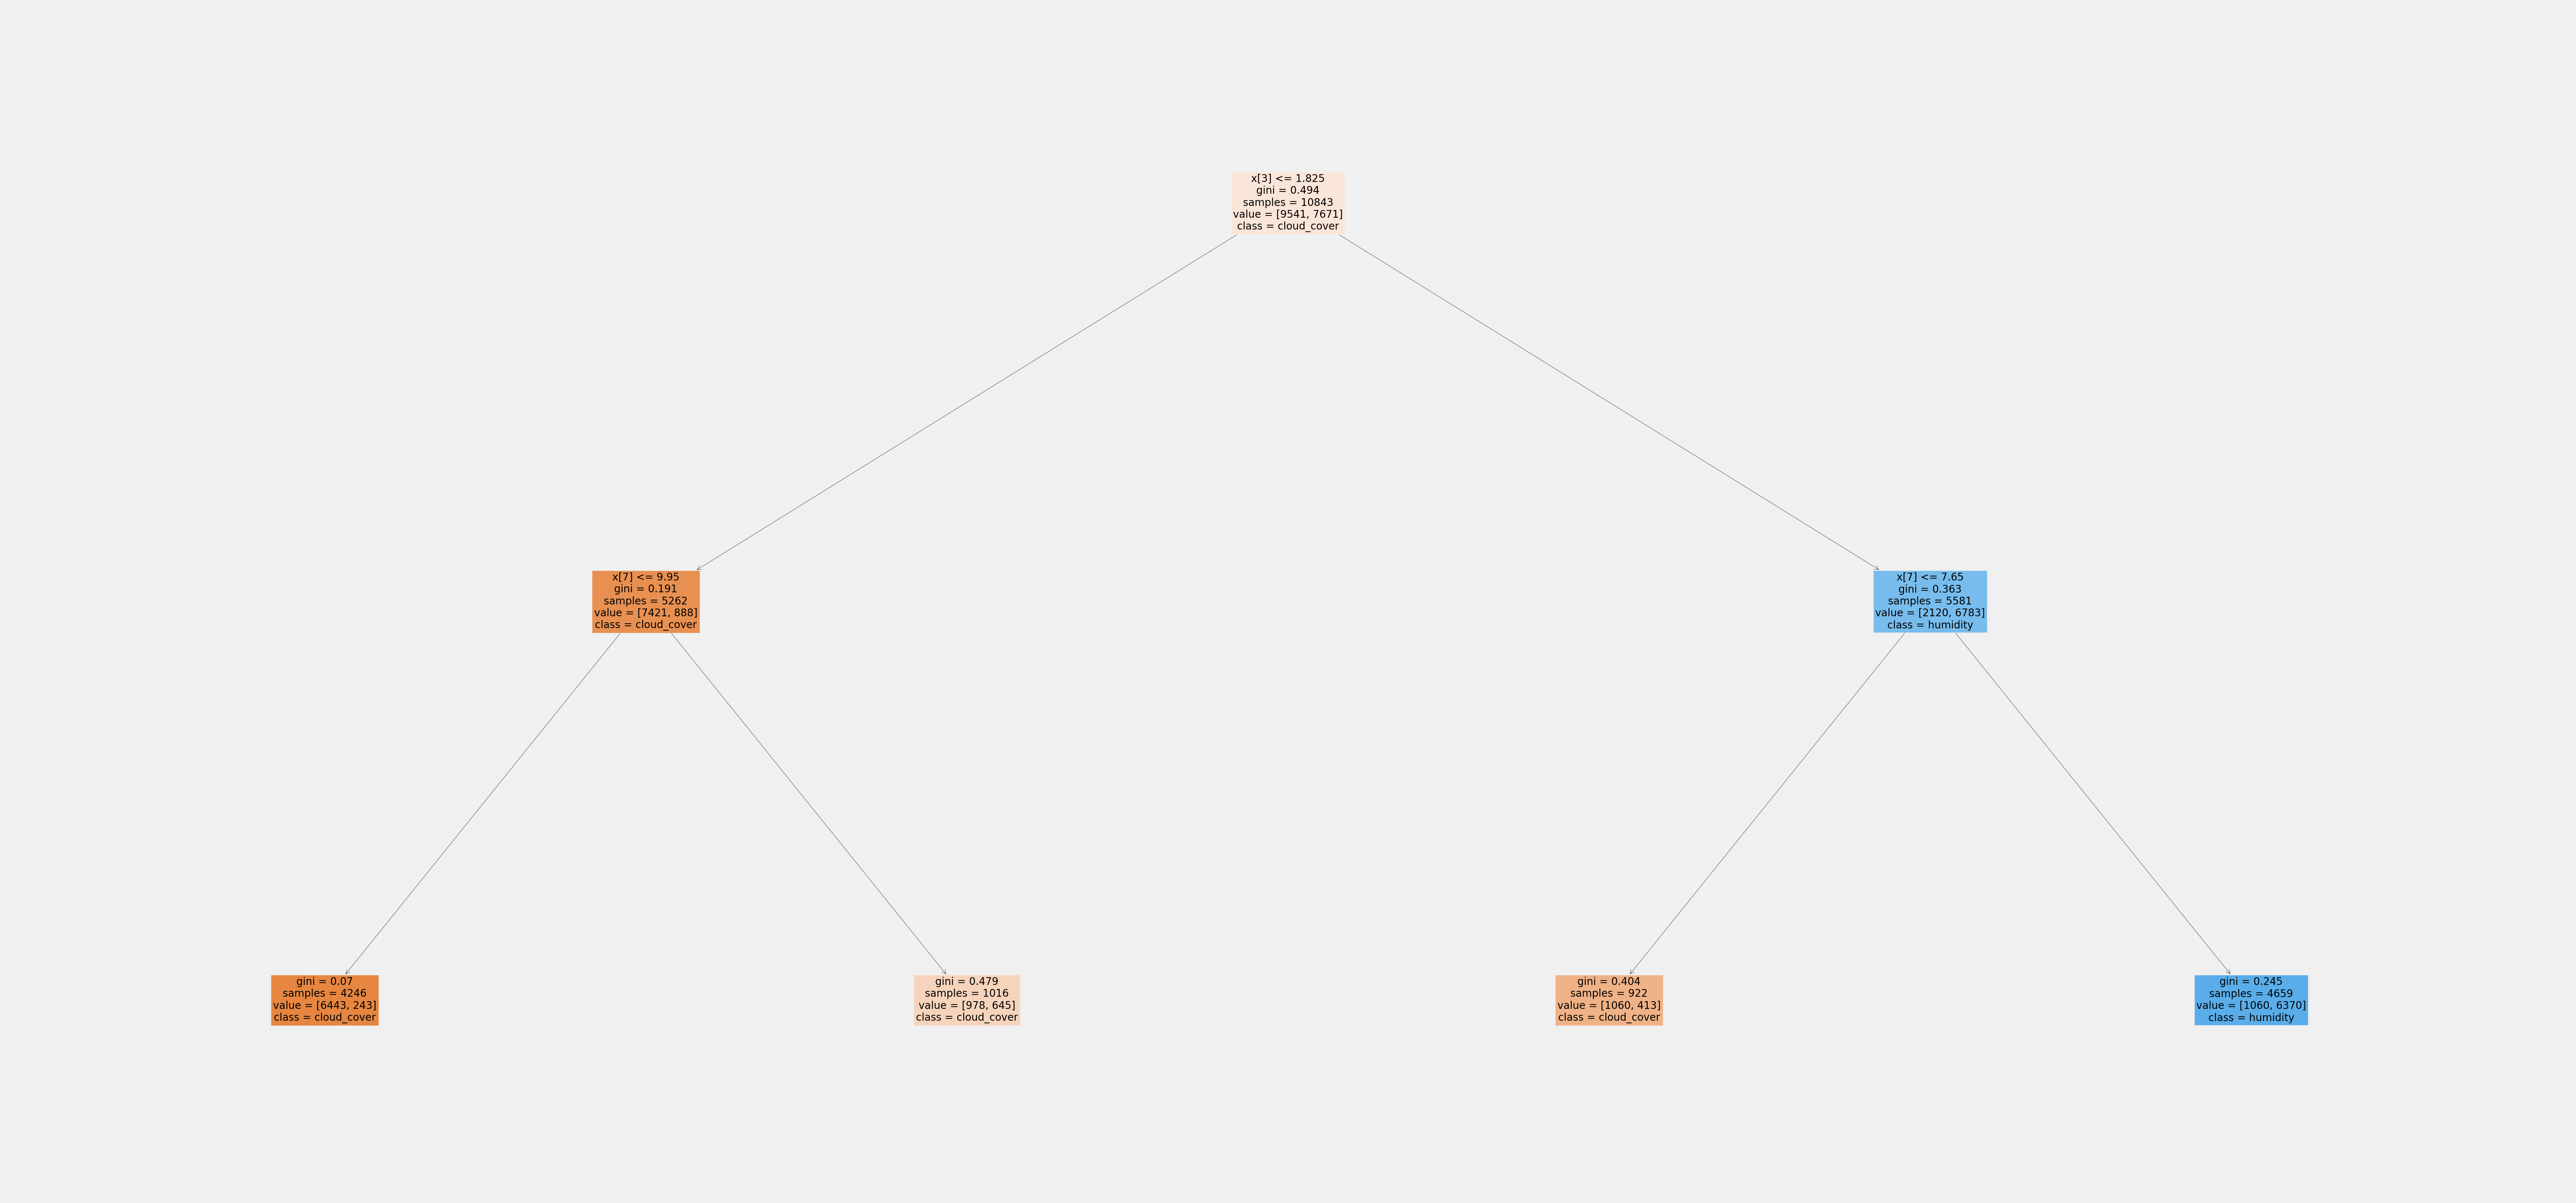

In [108]:
figM2 = plt.figure(figsize=(80,40))
plot_tree(clfM.estimators_[99], fontsize = 20, class_names=measurements, filled=True);

In [111]:
# Retrieve feature importances from the trained model
feature_importancesM = clfM.feature_importances_
print("Feature Importances:", feature_importancesM)
print(feature_importancesM.shape)

Feature Importances: [0.01987175 0.02628425 0.         0.0923774  0.07955412 0.07911121
 0.23232466 0.05459797 0.41587865]
(9,)


In [112]:
# Create a dataframe to associate observation measurements with their importances
importancesM = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importancesM
})

In [113]:
# Sort by importance for chart readability
importancesM = importancesM.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importancesM)

Feature Importance:
        Measurement  Importance
8          temp_max    0.415879
6         temp_mean    0.232325
3  global_radiation    0.092377
4     precipitation    0.079554
5          sunshine    0.079111
7          temp_min    0.054598
1          humidity    0.026284
0       cloud_cover    0.019872
2          pressure    0.000000


sumarrayM = np.sum(important[0], axis=0)
print(sumarrayM)

importantM = pd.Series(sumarrayM, index = measurements)
importantM

* when running this code block^ the importances remained the same, used similar code block in the example script instead

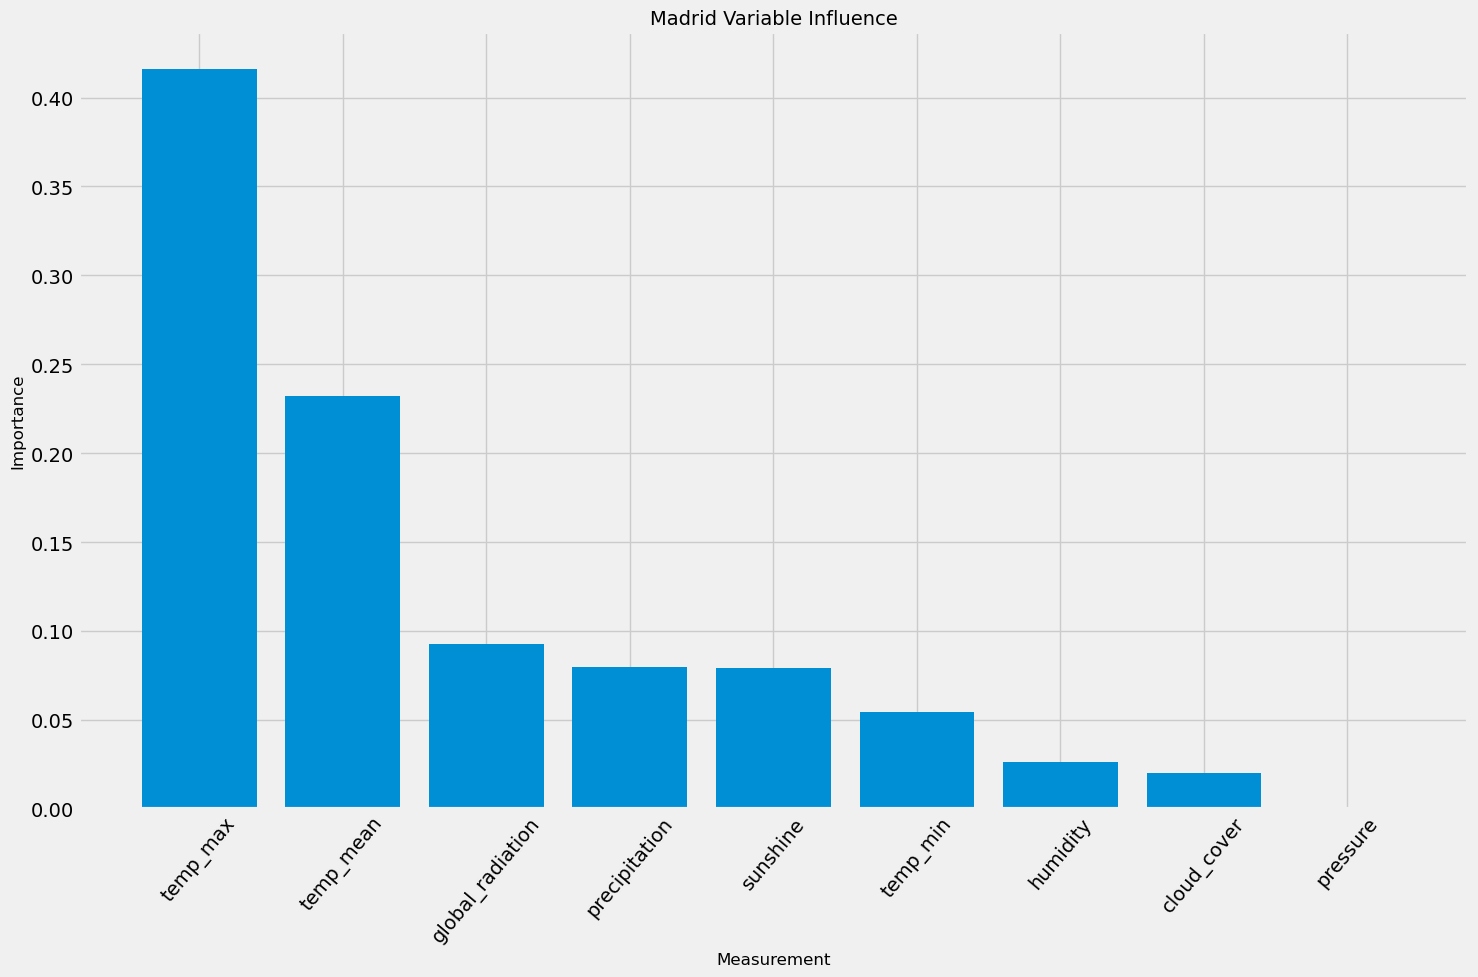

In [117]:
# Plot the importances

plt.style.use('fivethirtyeight')
plt4 = plt.figure(figsize=(15, 10))
plt.bar(importancesM['Measurement'], importancesM['Importance'])
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid Variable Influence", fontsize=14)
plt.tight_layout()
plt.show()

* Madrid top 3 influences are temp max, temp mean and global radiation 

## 5 Oslo

In [89]:
#make dataframe from df limiting data to one station
oslodf=df[df.columns[df.columns.astype(str).str.startswith('OSLO')]]
oslodf.head()

OSLO_cloud_cover  OSLO_humidity  OSLO_pressure  OSLO_global_radiation  \
0                 8           0.98         0.9978                   0.04   
1                 8           0.62         1.0139                   0.04   
2                 8           0.69         1.0234                   0.04   
3                 8           0.98         1.0244                   0.04   
4                 8           0.96         1.0092                   0.05   

   OSLO_precipitation  OSLO_sunshine  OSLO_temp_mean  OSLO_temp_min  \
0                1.14            0.0             4.9            3.8   
1                0.00            0.0             3.4            2.8   
2                0.08            0.0             1.9            0.6   
3                0.35            0.0             3.0            0.4   
4                0.26            0.0             3.7            2.9   

   OSLO_temp_max  
0            5.9  
1            4.9  
2            3.1  
3            4.9  
4            4.9

In [90]:
#make dataframe from pleasantdf limiting data to one stations
oslopleasant=pleasantdf[pleasantdf.columns[pleasantdf.columns.astype(str).str.startswith('OSLO')]]
oslopleasant.head()

OSLO_pleasant_weather
0                      0
1                      0
2                      0
3                      0
4                      0

In [91]:
#checking shape
print(oslodf.shape)
print(oslopleasant.shape)

(22950, 9)
(22950, 1)


In [92]:
#y
osloy=oslopleasant.max(axis=1)
print(osloy.shape)

(22950,)


In [93]:
#x
osloX=oslodf.to_numpy()
print(oslodf.shape)

(22950, 9)


In [94]:
# Split data into training and testing sets
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(osloX, osloy, random_state=2)

# Check shapes
print(X_train_O.shape, y_train_O.shape)
print(X_test_O.shape, y_test_O.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [118]:
# Creating a Random Forest classifier
clfO = RandomForestClassifier(n_estimators = 100, max_depth=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clfO.fit(X_train_O, y_train_O)

RandomForestClassifier(max_depth=2)

In [119]:
# performing predictions on the test dataset
y_pred_O = clfO.predict(X_test_O)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_O, y_pred_O))

Model Accuracy:  0.9651446497037295


[Text(0.4, 0.8333333333333334, 'x[8] <= 17.95\ngini = 0.259\nsamples = 10885\nvalue = [14576, 2636]\nclass = cloud_cover'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8162\nvalue = [12907, 0]\nclass = cloud_cover'),
 Text(0.6, 0.5, 'x[5] <= 8.75\ngini = 0.475\nsamples = 2723\nvalue = [1669, 2636]\nclass = humidity'),
 Text(0.4, 0.16666666666666666, 'gini = 0.46\nsamples = 1296\nvalue = [1300, 725]\nclass = cloud_cover'),
 Text(0.8, 0.16666666666666666, 'gini = 0.271\nsamples = 1427\nvalue = [369, 1911]\nclass = humidity')]

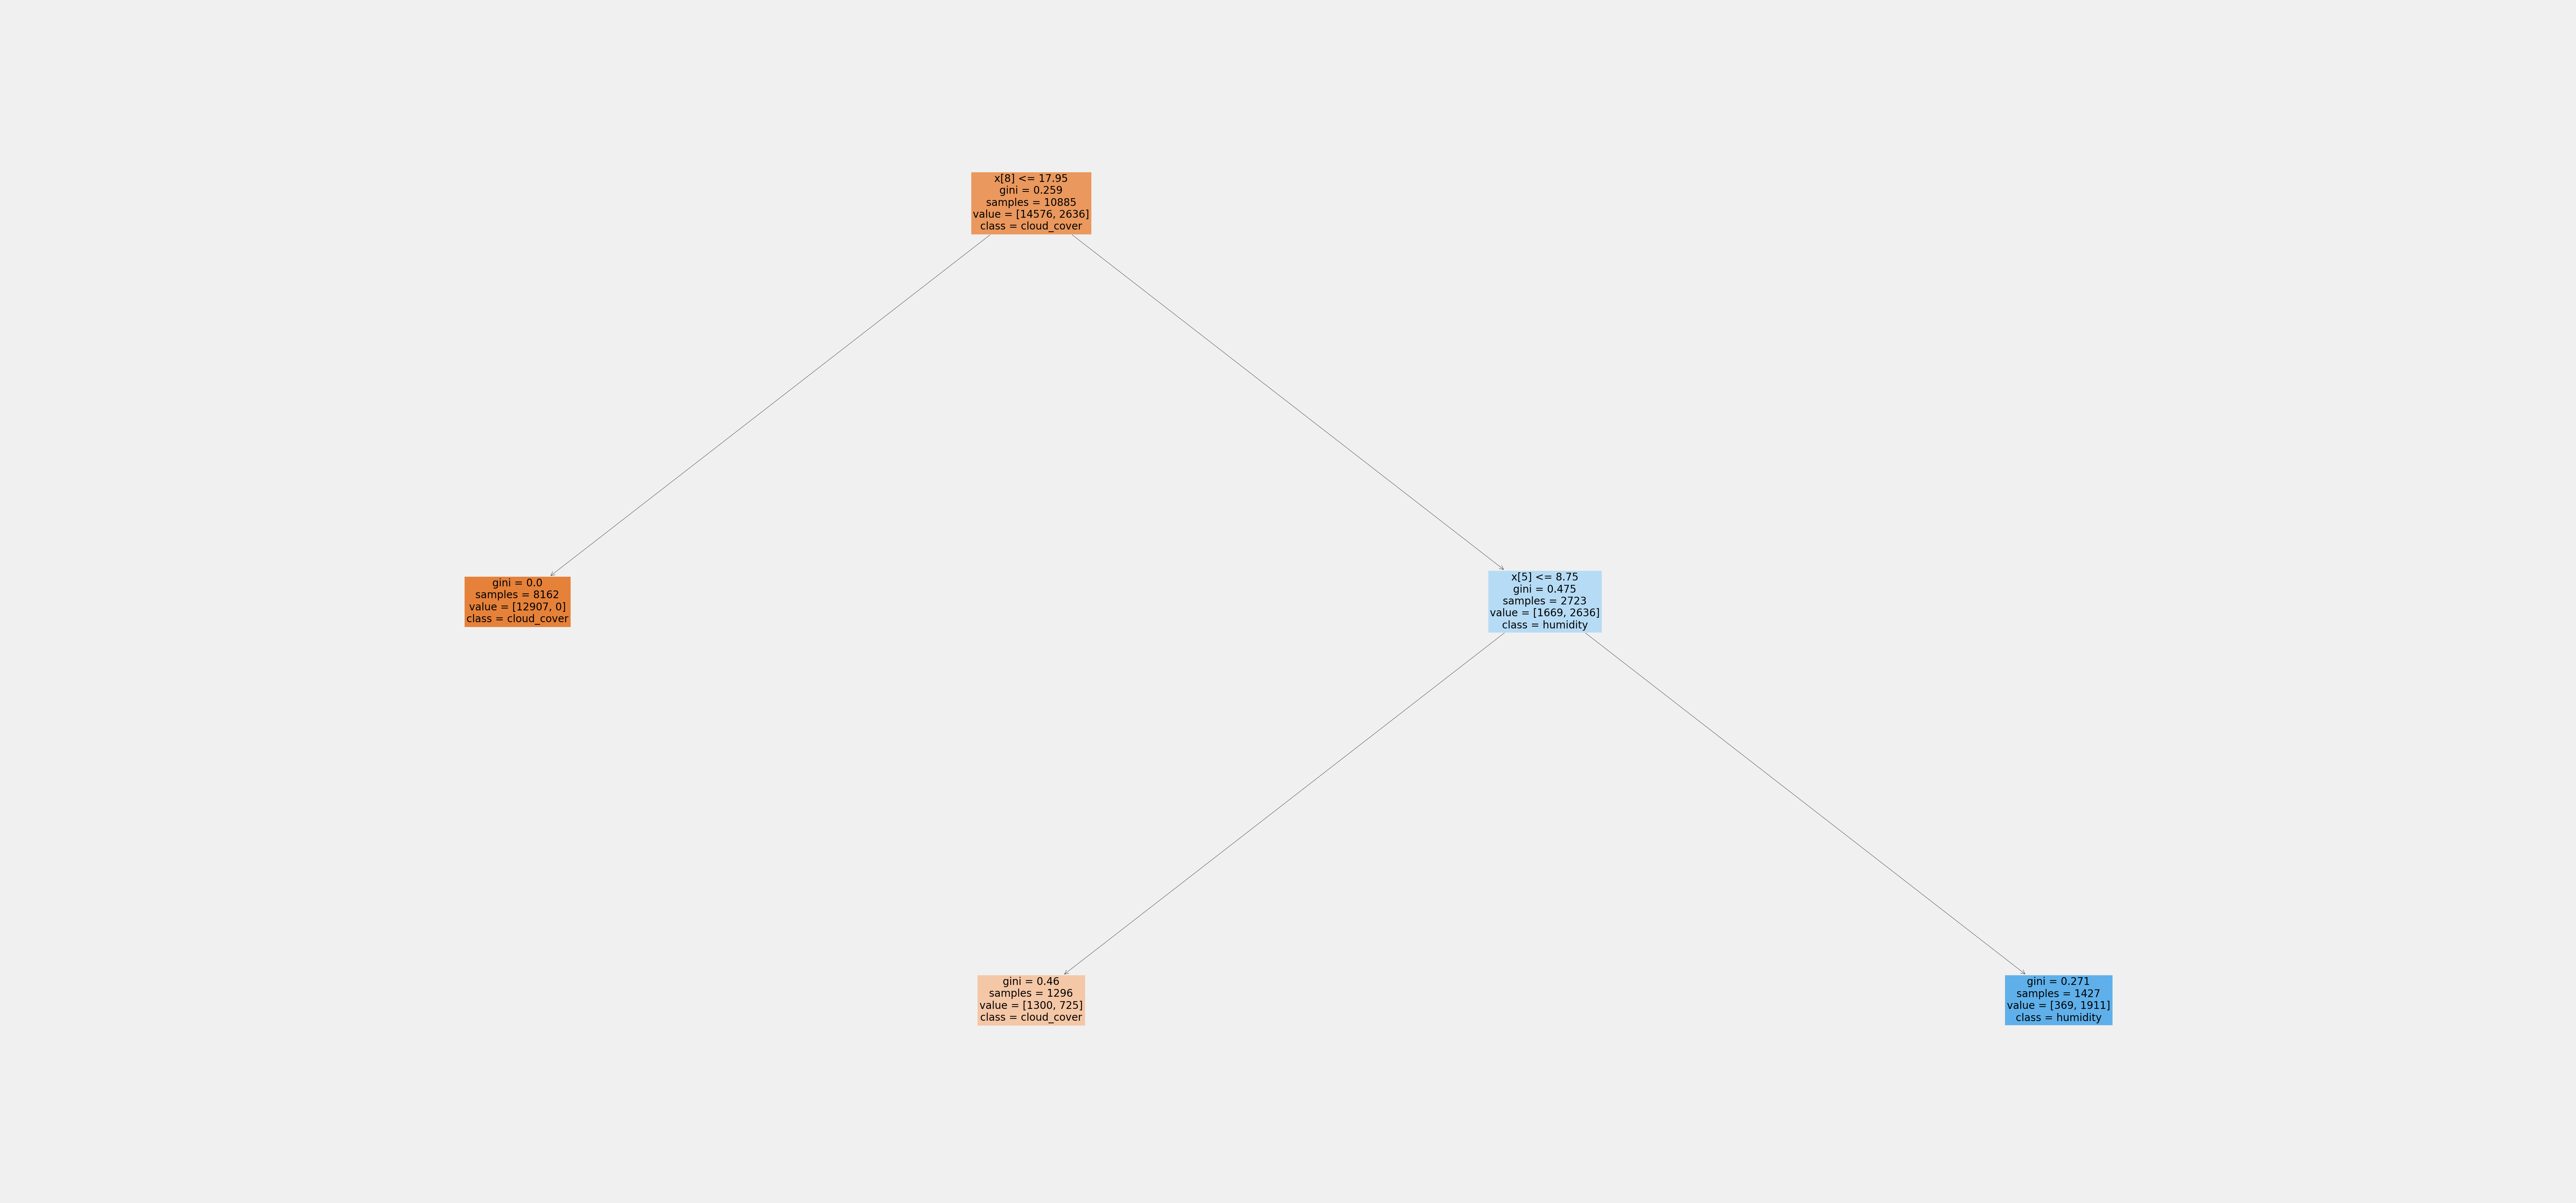

In [120]:
figO = plt.figure(figsize=(80,40))
plot_tree(clfO.estimators_[15], fontsize = 20, class_names=measurements, filled=True)

In [121]:
figO.savefig(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\3 VISUALIZATIONS/OSLO_decision_tree.png")

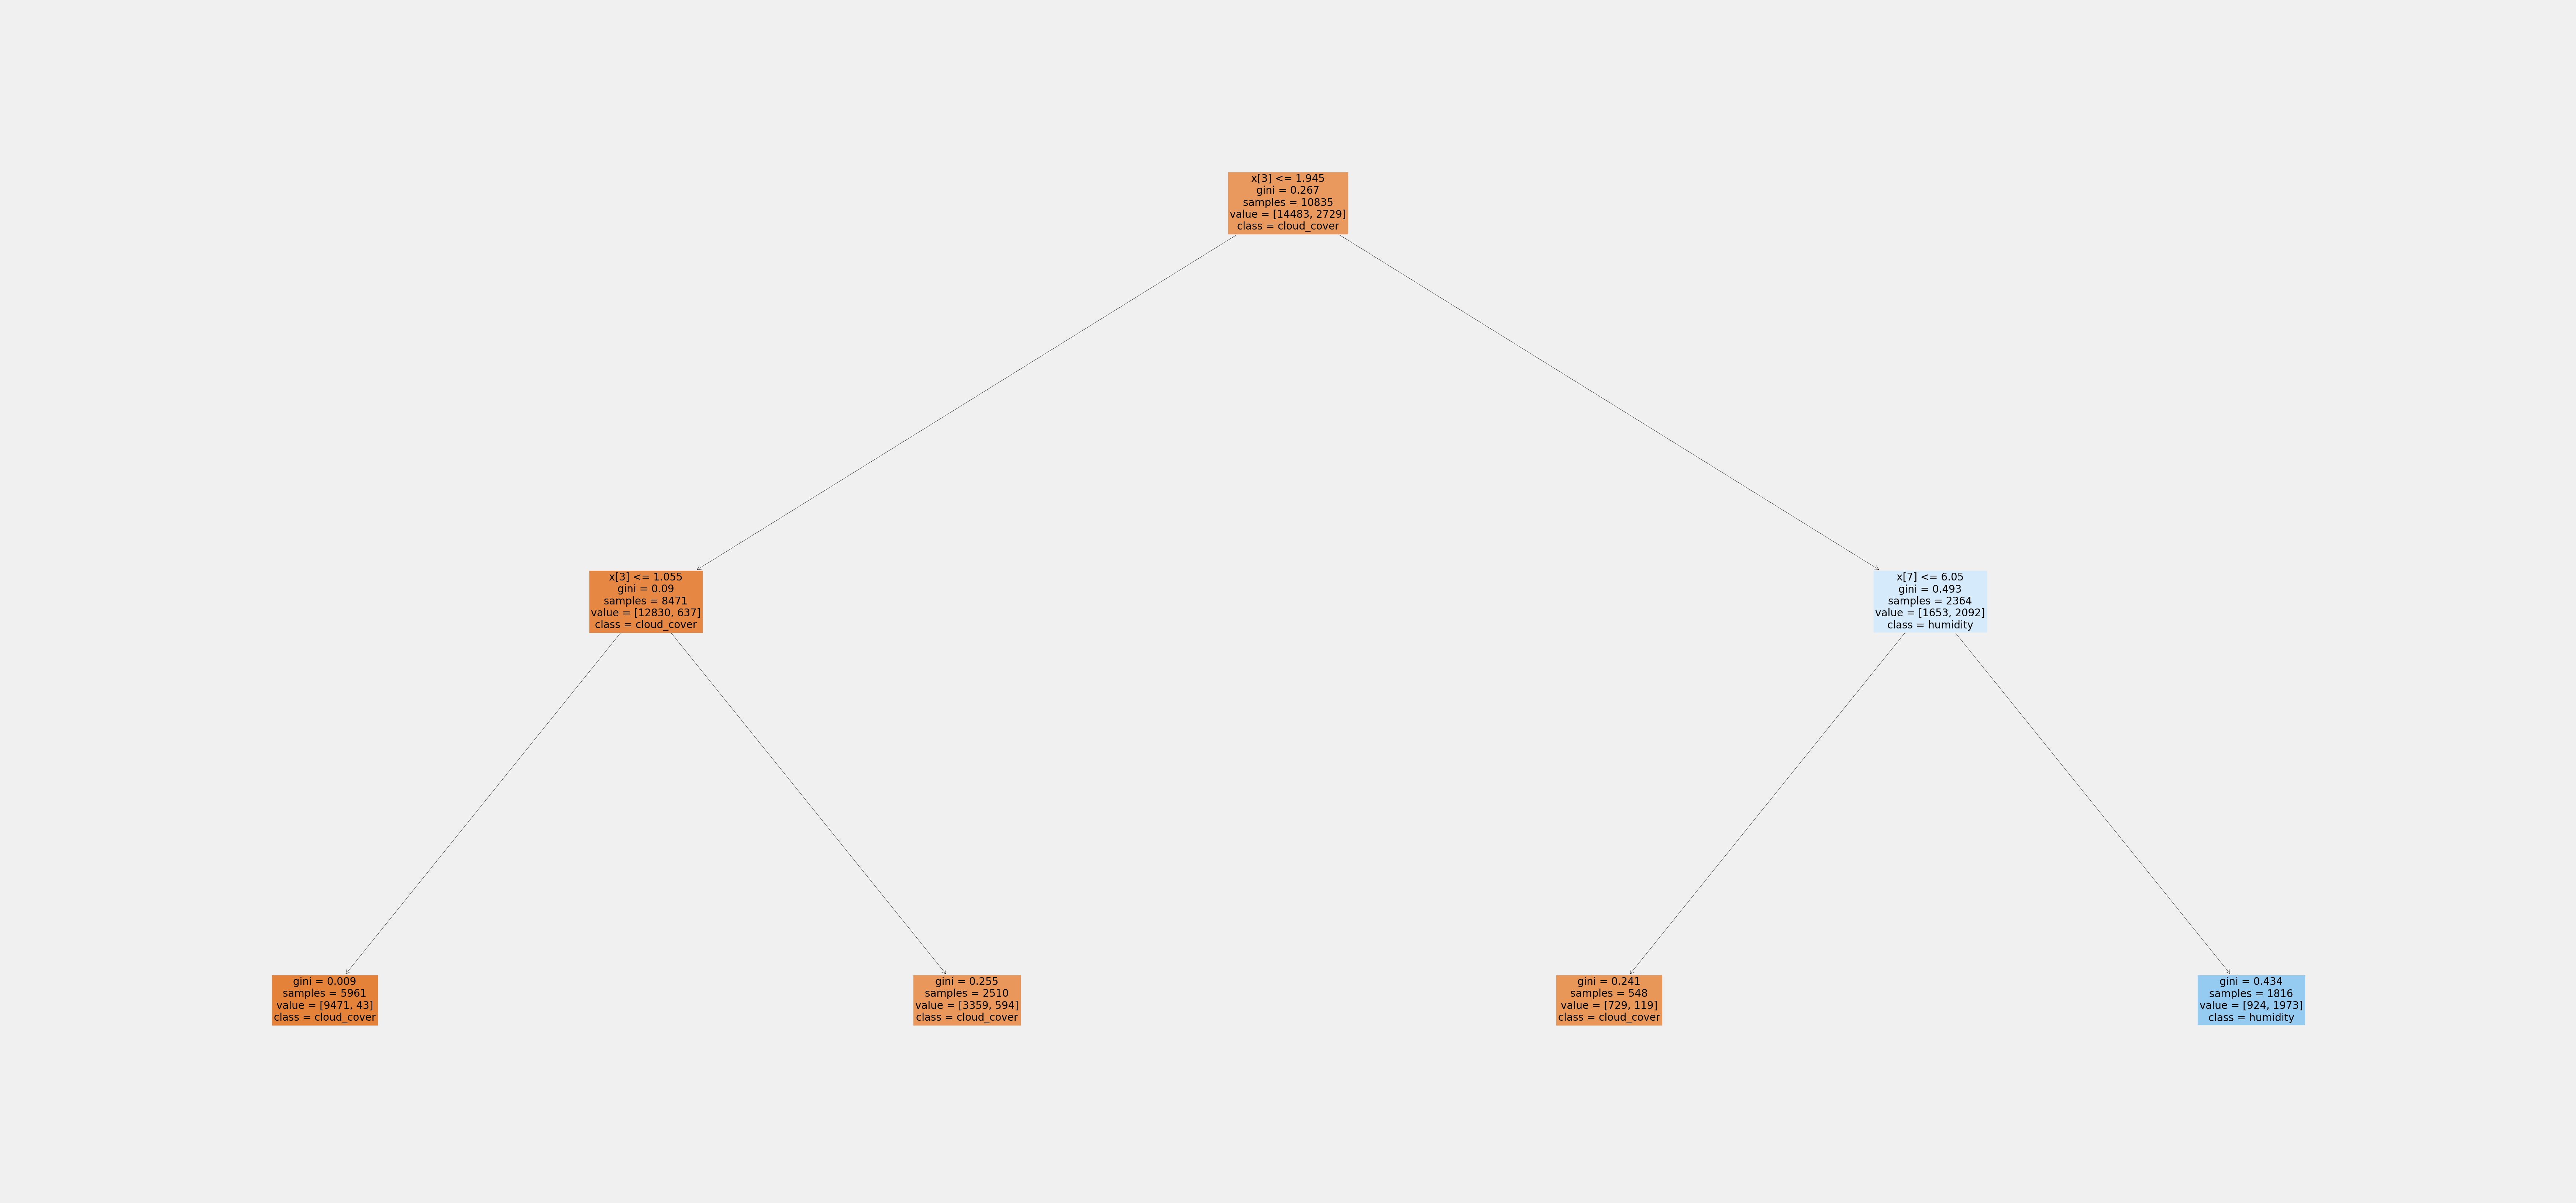

In [122]:
figO2 = plt.figure(figsize=(80,40))
plot_tree(clfO.estimators_[99], fontsize = 20, class_names=measurements, filled=True);

In [123]:
# Retrieve feature importances from the trained model
feature_importancesO = clfO.feature_importances_
print("Feature Importances:", feature_importancesO)
print(feature_importancesO.shape)

Feature Importances: [0.02588741 0.01950126 0.         0.15644717 0.10769177 0.0893439
 0.22098262 0.057987   0.32215888]
(9,)


In [124]:
# Create a dataframe to associate observation measurements with their importances
importancesO = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importancesO
})

In [125]:
# Sort by importance for chart readability
importancesO = importancesO.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importancesO)

Feature Importance:
        Measurement  Importance
8          temp_max    0.322159
6         temp_mean    0.220983
3  global_radiation    0.156447
4     precipitation    0.107692
5          sunshine    0.089344
7          temp_min    0.057987
0       cloud_cover    0.025887
1          humidity    0.019501
2          pressure    0.000000


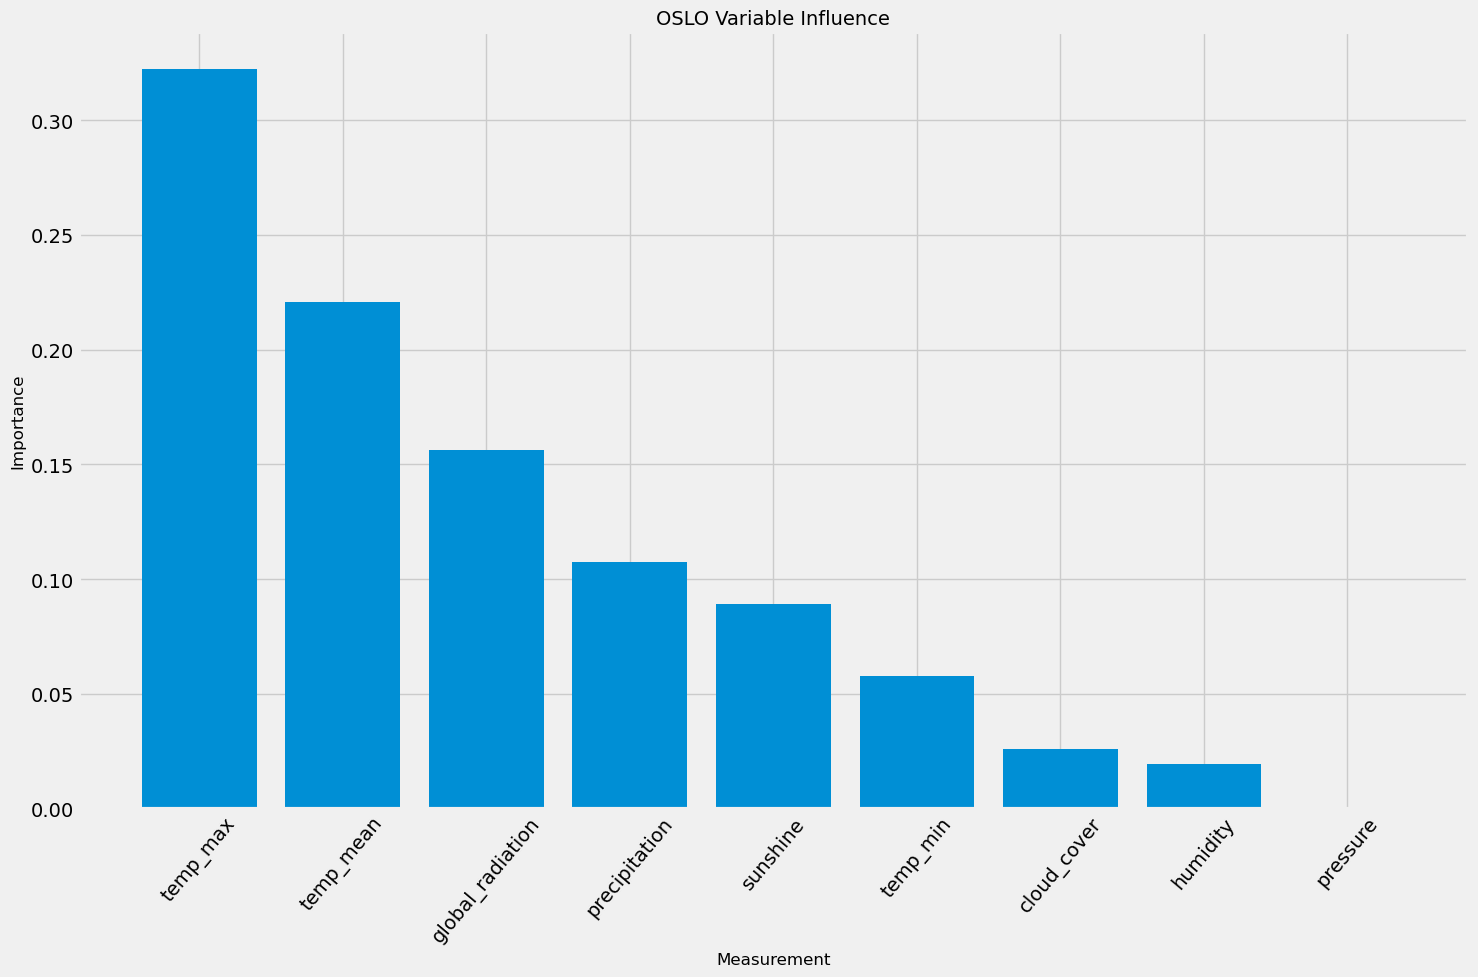

In [126]:
# Plot the importances

plt.style.use('fivethirtyeight')
plt5 = plt.figure(figsize=(15, 10))
plt.bar(importancesO['Measurement'], importancesO['Importance'])
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("OSLO Variable Influence", fontsize=14)
plt.tight_layout()
plt.show()

## 6 Valentia

In [127]:
#make dataframe from df limiting data to one station
valdf=df[df.columns[df.columns.astype(str).str.startswith('VALENTIA')]]
valdf.head()

VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4

In [128]:
#make dataframe from pleasantdf limiting data to one stations
valpleasant=pleasantdf[pleasantdf.columns[pleasantdf.columns.astype(str).str.startswith('VALENTIA')]]
valpleasant.head()

VALENTIA_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [129]:
#checking shape
print(valdf.shape)
print(valpleasant.shape)

(22950, 9)
(22950, 1)


In [130]:
#y
valy=valpleasant.max(axis=1)
print(valy.shape)

(22950,)


In [131]:
#x
valX=valdf.to_numpy()
print(valdf.shape)

(22950, 9)


In [132]:
# Split data into training and testing sets
X_train_V, X_test_V, y_train_V, y_test_V = train_test_split(valX, valy, random_state=2)

# Check shapes
print(X_train_V.shape, y_train_V.shape)
print(X_test_V.shape, y_test_V.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [133]:
# Creating a Random Forest classifier
clfV = RandomForestClassifier(n_estimators = 100, max_depth=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clfV.fit(X_train_V, y_train_V)

RandomForestClassifier(max_depth=2)

In [134]:
# performing predictions on the test dataset
y_pred_V = clfV.predict(X_test_V)
  

print("Model Accuracy: ", metrics.accuracy_score(y_test_V, y_pred_V))

Model Accuracy:  0.9844893691181597


[Text(0.4, 0.8333333333333334, 'x[8] <= 17.95\ngini = 0.099\nsamples = 10874\nvalue = [16315, 897]\nclass = cloud_cover'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 9814\nvalue = [15492, 0]\nclass = cloud_cover'),
 Text(0.6, 0.5, 'x[7] <= 11.75\ngini = 0.499\nsamples = 1060\nvalue = [823, 897]\nclass = humidity'),
 Text(0.4, 0.16666666666666666, 'gini = 0.417\nsamples = 468\nvalue = [226, 538]\nclass = humidity'),
 Text(0.8, 0.16666666666666666, 'gini = 0.469\nsamples = 592\nvalue = [597, 359]\nclass = cloud_cover')]

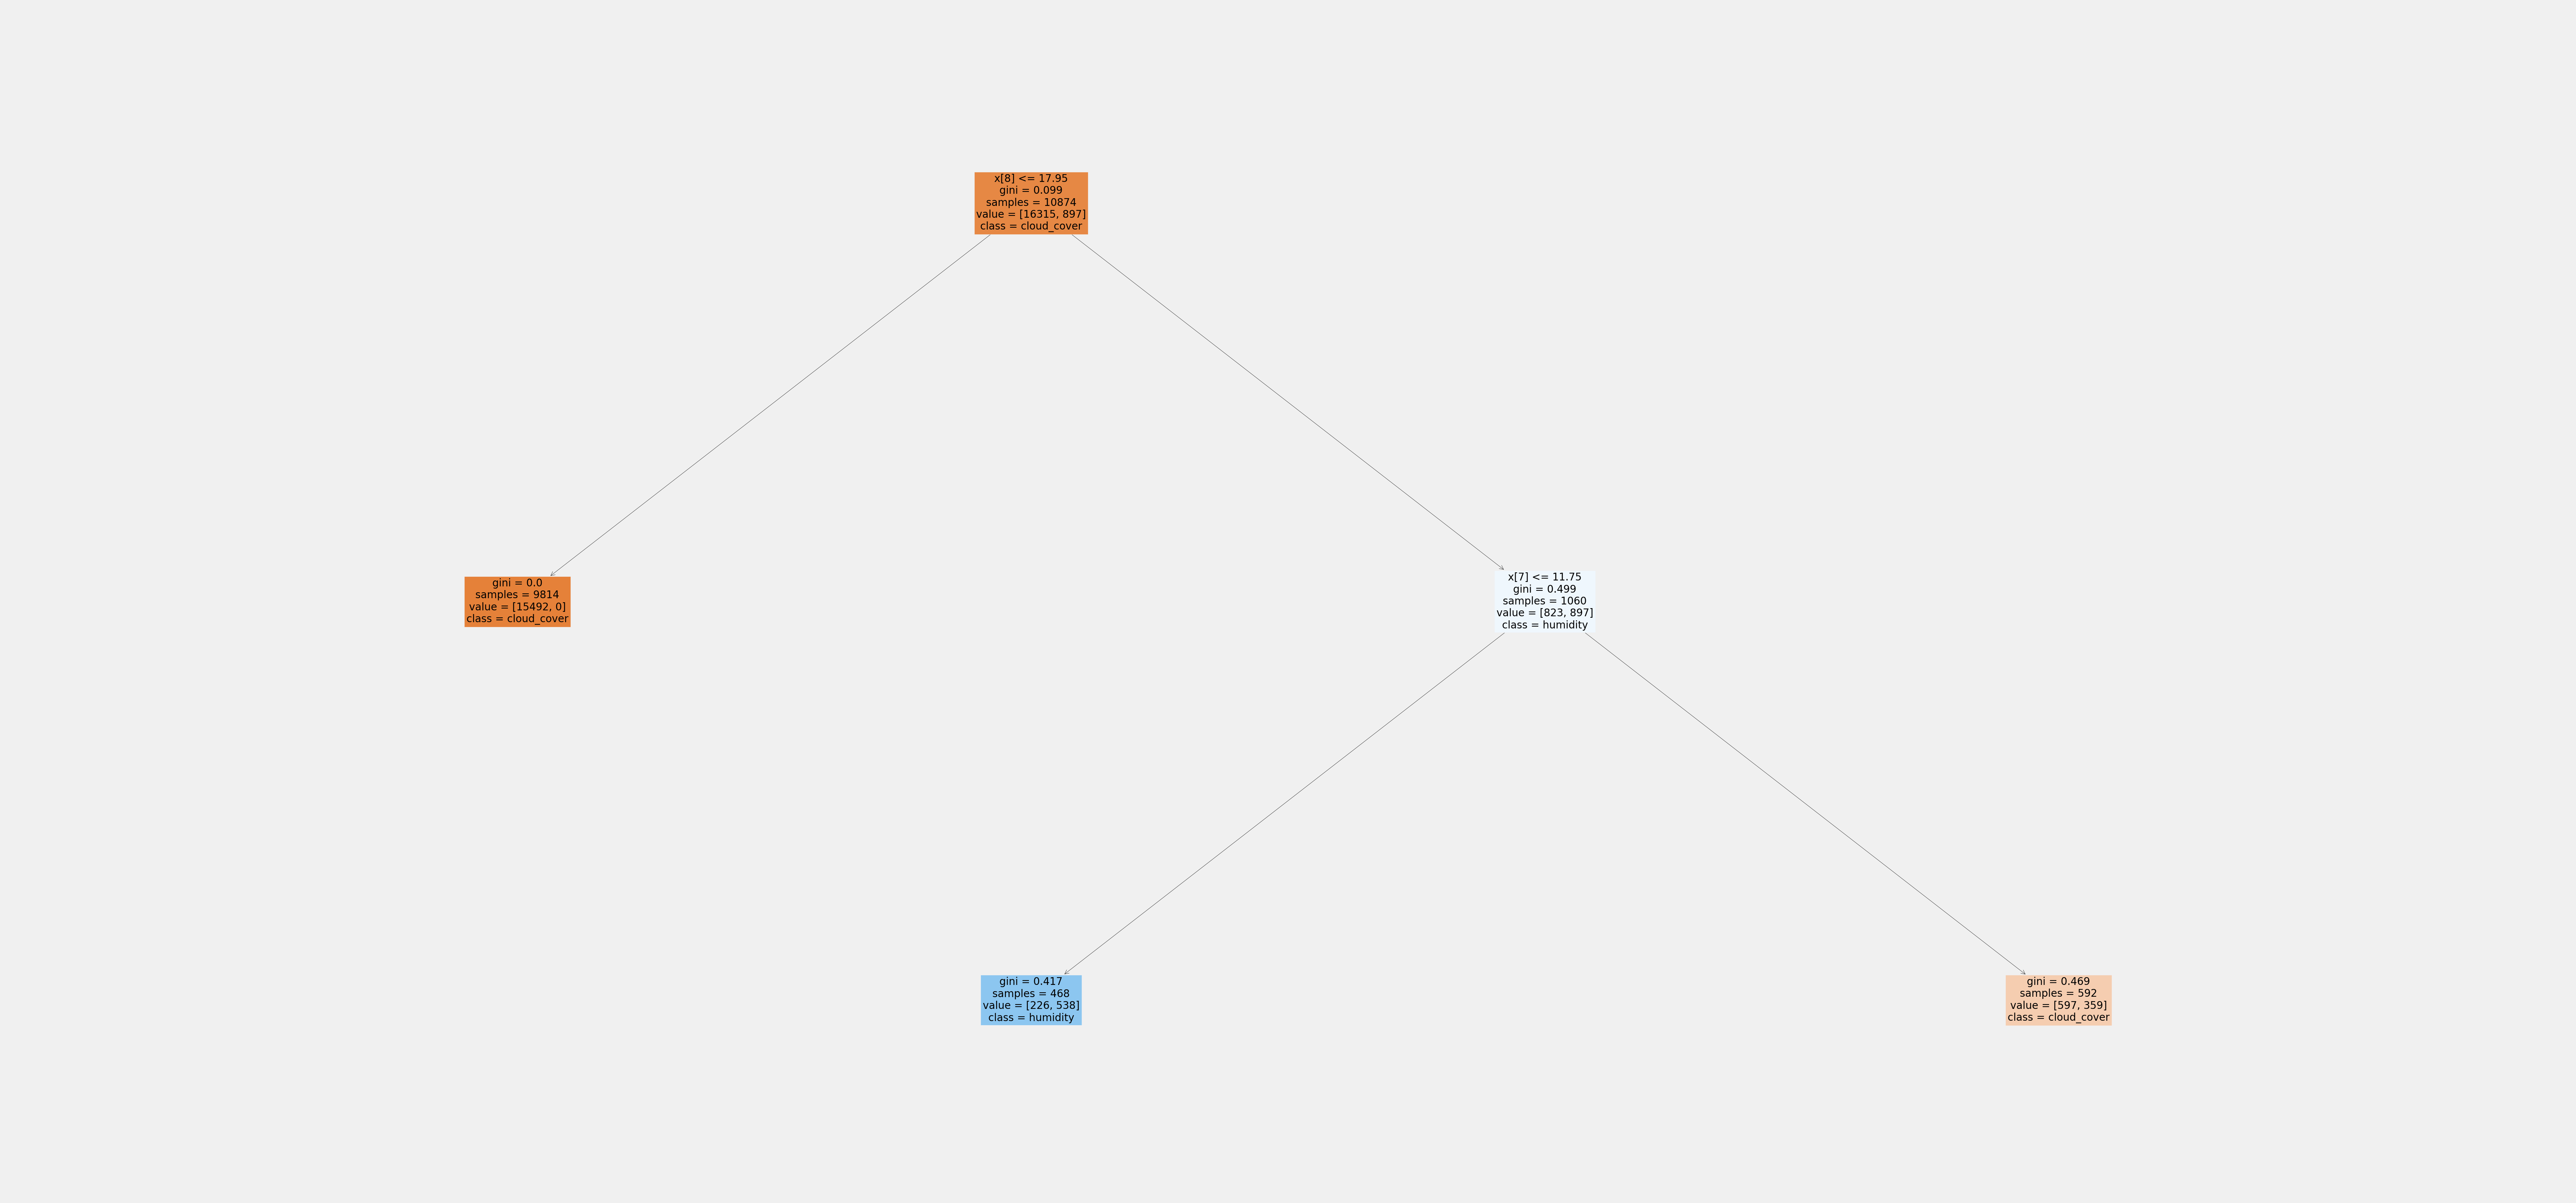

In [135]:
figV = plt.figure(figsize=(80,40))
plot_tree(clfV.estimators_[15], fontsize = 20, class_names=measurements, filled=True)

In [136]:
figV.savefig(r"C:\Users\Samth\CareerFoundry Projects\DSML Achievement 2\3 VISUALIZATIONS/VALENTIA_decision_tree.png")

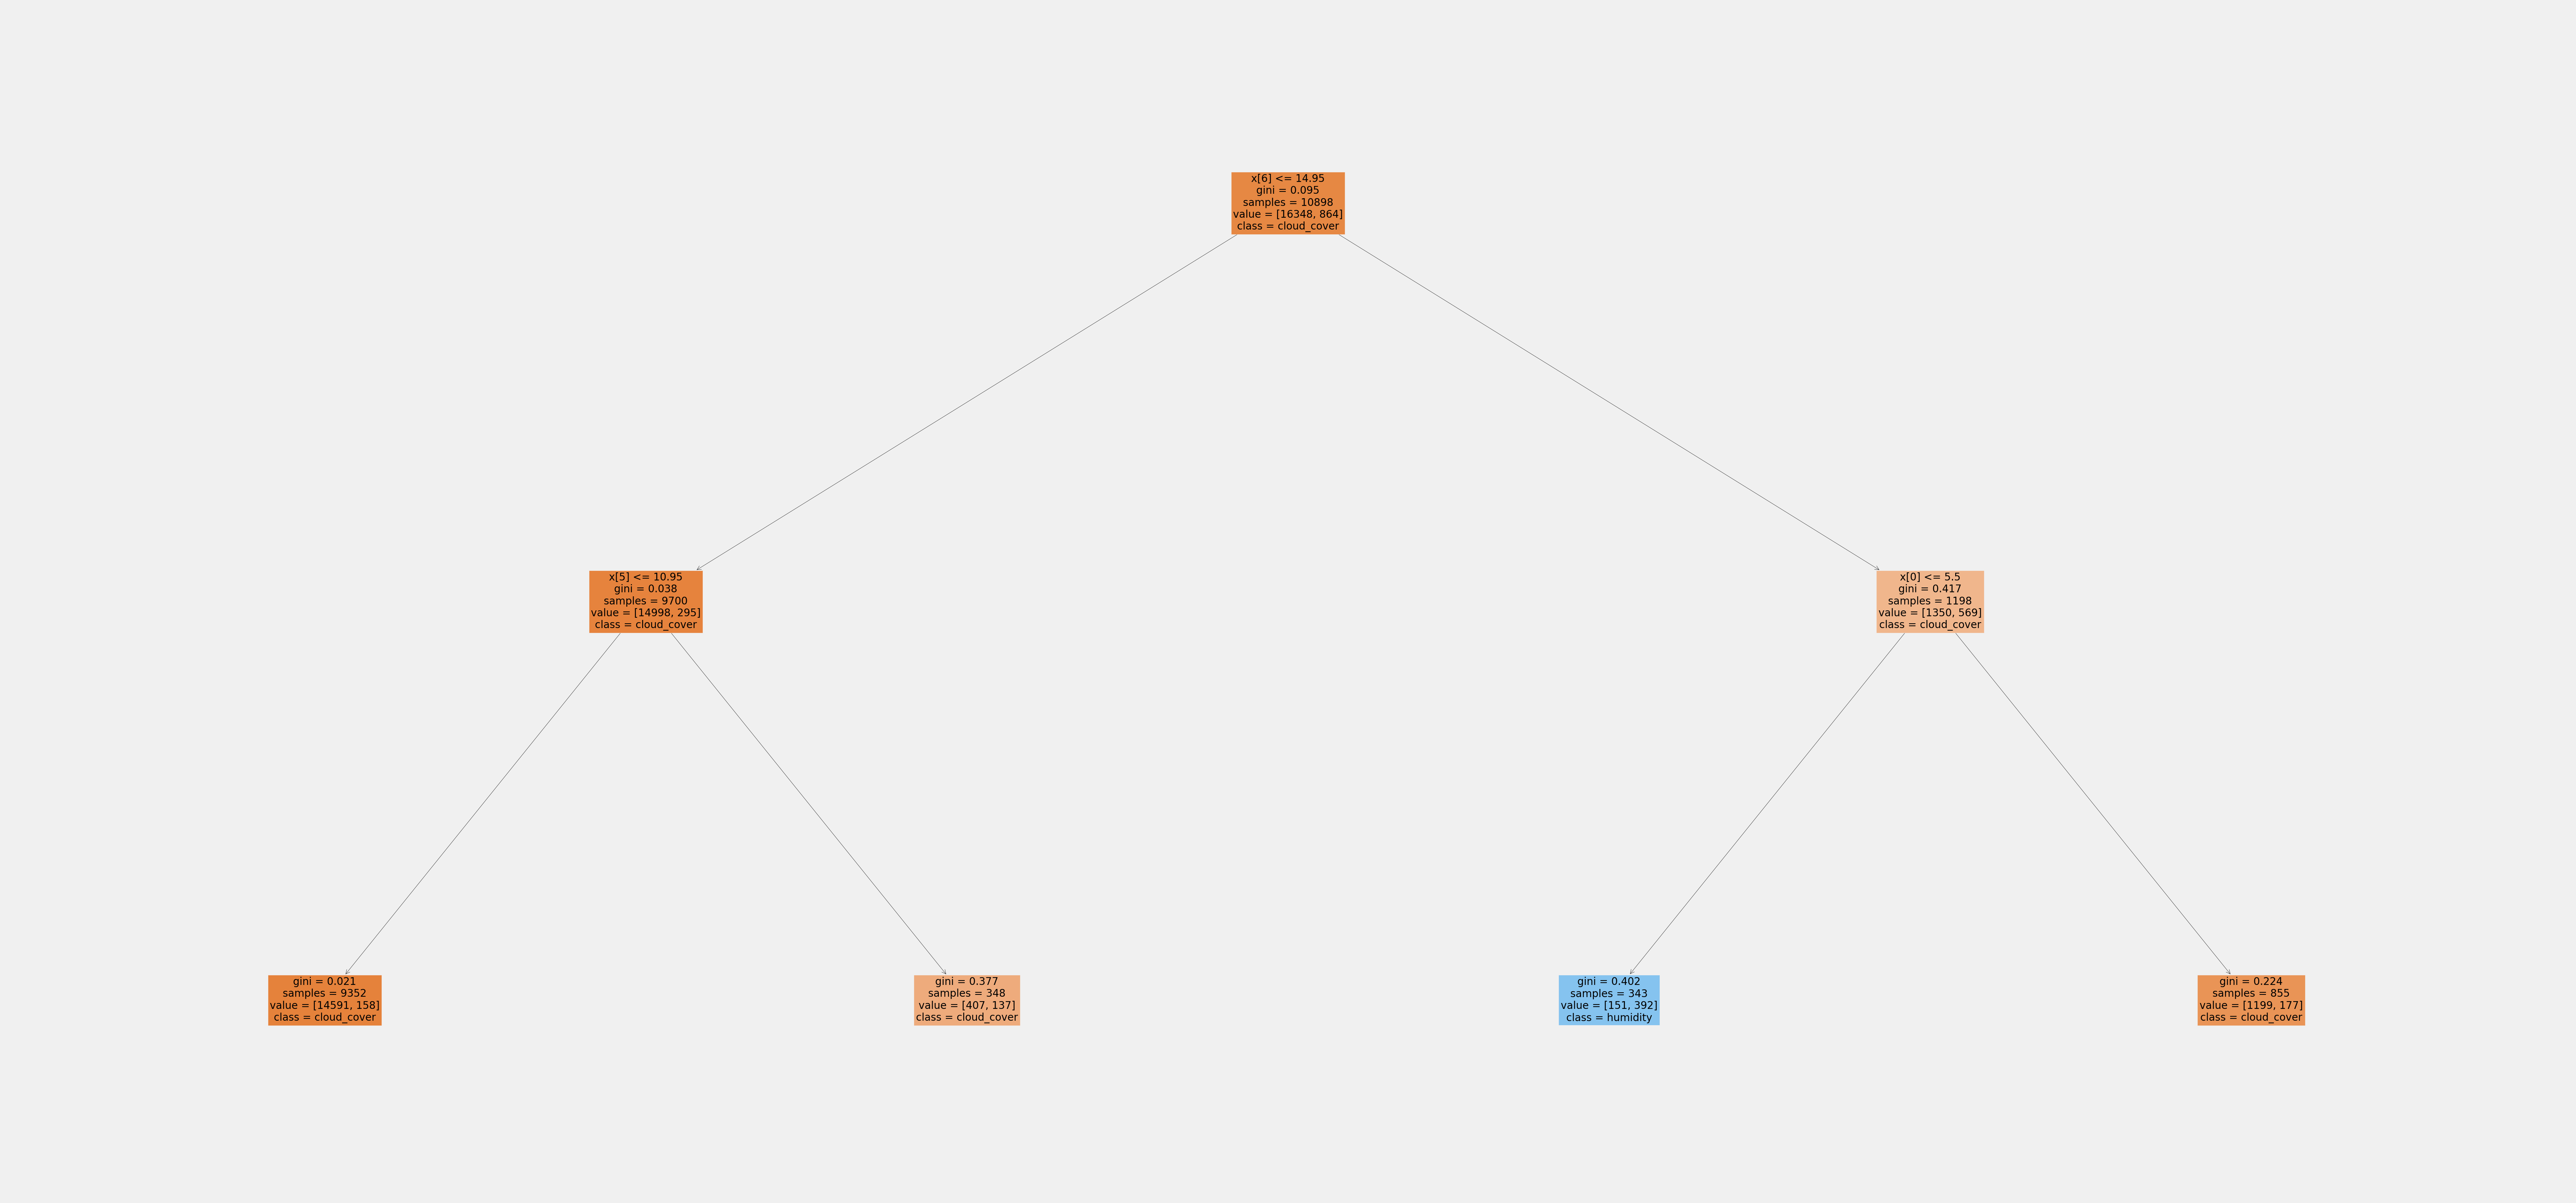

In [137]:
figV2 = plt.figure(figsize=(80,40))
plot_tree(clfV.estimators_[99], fontsize = 20, class_names=measurements, filled=True);

In [138]:
# Retrieve feature importances from the trained model
feature_importancesV = clfV.feature_importances_
print("Feature Importances:", feature_importancesV)
print(feature_importancesV.shape)

Feature Importances: [0.05620788 0.0008565  0.00565506 0.08502317 0.22241355 0.09049801
 0.16099195 0.01229325 0.36606063]
(9,)


In [139]:
# Create a dataframe to associate observation measurements with their importances
importancesV = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importancesV
})

In [140]:
# Sort by importance for chart readability
importancesV = importancesV.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importancesV)

Feature Importance:
        Measurement  Importance
8          temp_max    0.366061
4     precipitation    0.222414
6         temp_mean    0.160992
5          sunshine    0.090498
3  global_radiation    0.085023
0       cloud_cover    0.056208
7          temp_min    0.012293
2          pressure    0.005655
1          humidity    0.000857


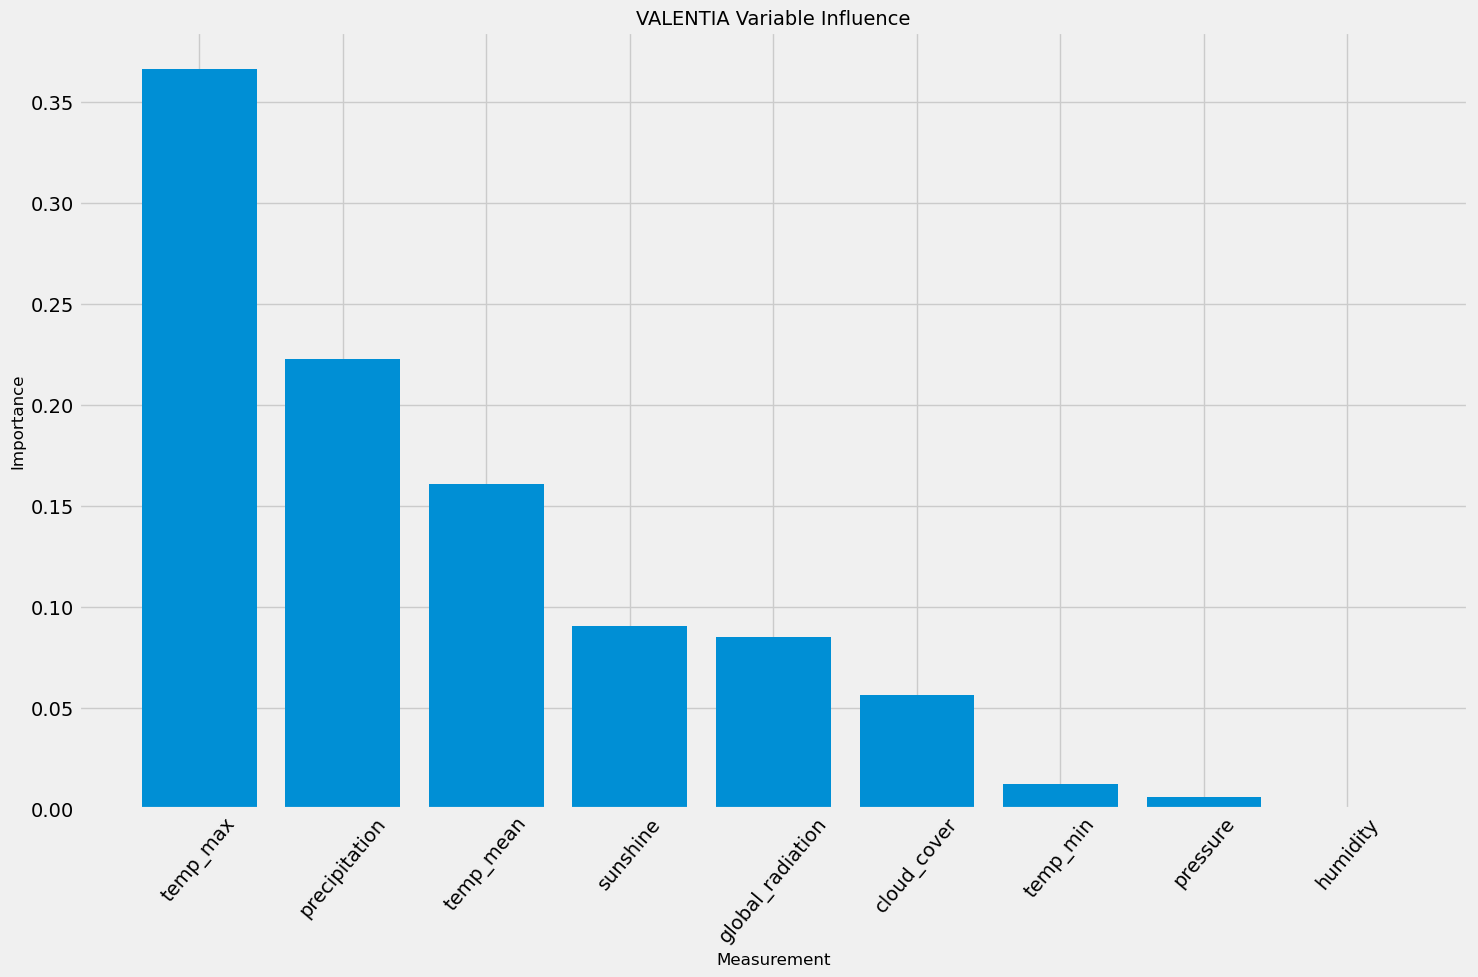

In [141]:
# Plot the importances

plt.style.use('fivethirtyeight')
plt5 = plt.figure(figsize=(15, 10))
plt.bar(importancesV['Measurement'], importancesV['Importance'])
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("VALENTIA Variable Influence", fontsize=14)
plt.tight_layout()
plt.show()

* Valentia top 3 variables are temp max, precipitation, temp mean